Τελική Εργασία
ΕΔΔΕ2 "Ανάλυση Μεγάλων Δεδομένων μέσω της Γλώσσας Python"
Στo πλαίσιo της τελικής εργασίας σας, ζητείται να αναλύσετε ένα μεγάλο αριθμό δεδομένων
(N>500) τα οποία αναφέρονται σε ένα ελληνικό θέμα και συγκεκριμένα στην ελληνική
ειδησεογραφία με θέμα την Covid-19, με το σύνολο (ή ένα μέρος) των δεδομένων να έχουν
εξορυχθεί από το διαδίκτυο με τεχνικές scraping (Beautiful Soup). Μπορείτε επίσης να
συγκεντρώσετε για την ίδια χρονική περίοδο tweets (και με χρήση workbench). Για την ανάλυση
των δεδομένων σας θα πρέπει να κάνετε τα παρακάτω βήματα επεξεργασίας:
1. Να εξορύξετε τα δεδομένα σας με χρήση των παραπάνω τεχνικών.
2. Τα δεδομένα θα πρέπει να εισαχθούν στην Python σε μορφή dataframe
3. Να κάνετε καθαρισμό των δεδομένων από άχρηστα στοιχεία, NaN values, περιττά κείμενα
και επιπλέον στήλες.
4. Αν απαιτείται, μπορείτε να τα επεξεργαστείτε κατάλληλα (αφαίρεση stopwords,
stemming/lemmatization)
5. Να δημιουργήσετε νέες παραμέτρους ως στήλες στο dataframe όπως o μήνας, ο χρόνος,
ένα ποσοστό κ.λπ.
6. Να πραγματοποιήσετε αναλύσεις στα αριθμητικά δεδομένα σας και να δημιουργήσετε τα
αντίστοιχα γραφήματα, τα οποία δείχνουν χαρακτηριστικά και συσχετίσεις που κρύβουν τα
δεδομένα σας.
7. Μπορείτε να δημιουργήσετε διάφορα γραφήματα από τα κείμενά σας όπως (α) ένα
wordcloud, (β) ένα διάγραμμα με τις 15 πιο συχνές λέξεις και (γ) ένα διάγραμμα με τα πιο
συχνά διγράμματα (bigrams).
8. Χρησιμοποιήστε το πεδίο της ημερομηνίας ως index στο dataframe που θα δημιουργήσετε
ώστε να αξιοποιήσετε τις λειτουργίες της χρονοσειράς (resample()).
9. Κάνοντας χρήση του ελληνικού λεξικού για sentiment anaysis του NRC βρείτε την
πολικότητα (θετική - αρνητική) και τα συναισθήματα των κειμένων σας, και αποθηκεύστε τα
σε νέες στήλες στο dataframe των δεδομένων σας.
10. Δημιουργήστε γραφήματα ομαδοποιώντας μέσω του resample() την πολικότητα των
άρθρων σας ανά ημέρα/μήνα/3μηνο/έτος ανάλογα με το θέμα.
11. Αξιοποιήστε την διανυσματοποίηση των κειμένων σας (CountVectorizer()), και τη χρήση της
ομοιότητας κειμένων μέσω της συνάρτησης cosine_similarity() ώστε να βρείτε άρθρα που
έχουν μεγάλη ομοιότητα. Παρουσιάστε τη συσχέτιση αυτή μέσω γραφήματος τύπου
heatmap.
12. Ανεβάστε τα γραφήματα που κατασκευάσατε στο site: http://helios.media.uoa.gr/datajour/
φτιάχνοντας μια ιστορία (τουλάχιστον 800 λέξεις), αναφέροντας το όνομά σας. Βελτιώστε
όπου είναι δυνατόν την ποιότητα των γραφημάτων μέσω προγραμμάτων όπως το flourish,
datawrapper κ.λπ.
13. Ο κώδικάς σας μαζί με τα δεδομένα θα ανέβει στον προσωπικό σας λογαριασμό στο github
(αν τα δεδομένα υπερβαίνουν το όριο, βάλτε απλά ένα δείγμα ώστε να τρέχει ο κώδικας).
14. Το άρθρο σας σε μορφή pdf με τίτλο Eponimo_teliki_ergasia.zip μαζί με το link για τον
κώδικα (github) θα ανέβει στο eclass.
Η εργασία έχει τελική ημερομηνία παράδοσης: 7/7/2021

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import time

# Capital.gr Scraping Attempt
### *(article text issue)*



In [ ]:
#Scraping the articles on economy by Capital.gr
capital_url = 'https://www.capital.gr/oikonomia?page=1'
raw_html = urlopen(capital_url).read()
capital_doc = BeautifulSoup(raw_html, "html.parser")

In [ ]:
capital_doc

In [ ]:
capital_links = capital_doc.select("h2 a") 
capital_links

In [ ]:
capital_urls = [link['href'] for link in capital_links]
capital_urls

In [ ]:
capital_titles = [link.text for link in capital_links]
capital_titles

In [ ]:
def get_scraped_links(base_list): 
    scraped_links = []
    for url in base_list:
        parent = 'https://' + url.split('/')[2]
        req = requests.get(url, headers)
        print(req)
        soup = BeautifulSoup(req.content, 'html.parser')
        
        for link in soup.select("h2 a"):
            
            
            try:
                l = link.get('href')
                if l[0] == '/': 
                    l = parent + l
                    print(l)
                    scraped_links.append(l)
            
       
            except:
                print('no url')

    print(len(scraped_links))
    
    return scraped_links

In [ ]:
count = 1
pages = []
for i in range(0,20):
    count = count + 1
    page = 'https://www.capital.gr/oikonomia'
    newpage = page + '?page='+ str(count)
    pages.append(newpage)
    print(newpage)

https://www.capital.gr/oikonomia?page=2
https://www.capital.gr/oikonomia?page=3
https://www.capital.gr/oikonomia?page=4
https://www.capital.gr/oikonomia?page=5
https://www.capital.gr/oikonomia?page=6
https://www.capital.gr/oikonomia?page=7
https://www.capital.gr/oikonomia?page=8
https://www.capital.gr/oikonomia?page=9
https://www.capital.gr/oikonomia?page=10
https://www.capital.gr/oikonomia?page=11
https://www.capital.gr/oikonomia?page=12
https://www.capital.gr/oikonomia?page=13
https://www.capital.gr/oikonomia?page=14
https://www.capital.gr/oikonomia?page=15
https://www.capital.gr/oikonomia?page=16
https://www.capital.gr/oikonomia?page=17
https://www.capital.gr/oikonomia?page=18
https://www.capital.gr/oikonomia?page=19
https://www.capital.gr/oikonomia?page=20
https://www.capital.gr/oikonomia?page=21


In [ ]:
urls = get_scraped_links(pages) 

<Response [200]>
https://www.capital.gr/oikonomia/3557388/tte-ametablito-sto-0-06-to-meso-stathmismeno-epitokio-neon-katatheseon-auximeno-sto-3-95-ekeino-ton-neon-daneion
https://www.capital.gr/oikonomia/3557375/tourkia-se-upsilo-duo-eton-o-plithorismos-ton-iounio
https://www.capital.gr/oikonomia/3557362/sentix-beltiothike-gia-pempto-sunexomeno-mina-to-ependutiko-klima-stin-eurozoni
https://www.capital.gr/oikonomia/3557360/eurozoni-se-upsilo-15-eton-o-rmi-upiresion-ton-iounio
https://www.capital.gr/oikonomia/3557358/gsebee-epibeblimeni-i-entaxi-kai-ton-mme-sto-neo-exoikonomo
https://www.capital.gr/oikonomia/3557330/epistrefei-dunamika-to-made-in-france
https://www.capital.gr/oikonomia/3557323/rosia-anodos-tou-rmi-upiresion-ton-iounio-gia-ekto-sunexomeno-mina
https://www.capital.gr/oikonomia/3557314/kina-ti-xamiloteri-anodo-ton-teleutaion-14-minon-kategrapse-o-rmi-upiresion-tis-caixin
https://www.capital.gr/oikonomia/3557302/giati-i-kubernisi-xorkizei-ena-trito-lock-down-tis-oikonomias-

In [ ]:

    #we got an error before, 'NoneType' object is not subscriptable, the function is not finding anything
    # another error = wrong format - https:///oikonomia/3552327/i-g7-enekrine-to-sxedio-gia-ton-pagkosmio-etairiko-foro-15
    # capital_urls = get_scraped_links(pages)

In [ ]:
headers = {'user-agent': 'my-app/0.0.1'}
PAUSE_TIME = 3.5

def get_text(url):
    r = requests.get(url, headers = headers)
    time.sleep(PAUSE_TIME)
    s = BeautifulSoup(r.content, 'html.parser')
    link = s.find("h2 a")
    
    return([s, link])

In [ ]:
scraped_links = []
titles = []
counter = 0
base_url = "https://www.capital.gr/oikonomia?page="
for i in range(1,20):
    url = base_url + str(i)
    #print(url)
    page = requests.get(url, headers = headers)
    s = BeautifulSoup(page.content, 'html.parser')
    #print(s)
    links = s.select("h2 a")
    links = set(links)
    
    url = [link['href'] for link in links]
    
    title = [link.text for link in links]
    
    #print(url)

    for l in url:
        link = l
        l = "https://www.capital.gr" + l  #fixing wrong url formatting
        print(l)
        scraped_links.append(l)

print(url)
print(len(scraped_links)) 
scraped_links = (set(scraped_links))

https://www.capital.gr/oikonomia/3557451/upaat-epipleon-50-ekat-euro-gia-idiotikes-ependuseis-leader-se-oli-ti-xora
https://www.capital.gr/oikonomia/3557445/prostima-15-600-euro-kai-katasxesi-1-439-proionton-maimou-se-elegxous-kata-tou-paremporiou
https://www.capital.gr/oikonomia/3557487/oi-prothesmies-gia-sun-ergasia-gia-aprilio-maio-iounio-kai-gia-anastoles-sumbaseon-gia-martio-aprilio
https://www.capital.gr/oikonomia/3557496/to-dnt-proeidopoiei-megales-apokliseis-metaxu-xoron-stin-oikonomiki-anakampsi-apo-to-sok-tou-covid
https://www.capital.gr/oikonomia/3557424/enisxusi-gia-tous-xenagous-kai-touristikous-sunodous-gia-martio-aprilio-kai-maio
https://www.capital.gr/oikonomia/3557420/germania-perikoptei-tis-ektimiseis-gia-tin-paragogi-autokiniton-to-2021
https://www.capital.gr/oikonomia/3557450/pos-tha-dothei-i-epidotisi-theseon-ergasias-to-epomeno-trimino-paradeigmata
https://www.capital.gr/oikonomia/3557459/kupros-anodos-kata-58-6-ston-kuklo-ergasion-tis-biomixanias
https://www.capi

In [ ]:
len(scraped_links)

330

In [ ]:
#scraping each page
response = requests.get("https://www.capital.gr/oikonomia/3552692/se-proto-xrono-oi-parembaseis-gia-apergies-sundikalistes", headers=headers)
doc = BeautifulSoup(response.text)

In [ ]:
titles = doc.select("h1")[0].text
titles

'Σε πρώτο χρόνο οι παρεμβάσεις για απεργίες - συνδικαλιστές'

In [ ]:
author = doc.select("p")[0].text
author
 
#articleBody > p:nth-child(1) > strong   -- selector, doesn't work

'\nΤου Δημήτρη Κατσαγάνη\n'

In [ ]:
#body = doc.select("#articleBody")[0].text
#body = doc.find_all('div', {'id': 'articleBody'})
#body = doc.find_all('p', {'id': 'articleBody'})
#body = doc.select("p")
body = doc.find_all('p', {'style': 'text-align: justify;'})
###body - doc.find_next_siblings('')
body
# this looks very messy

[<p style="text-align: justify;">
 <strong>Του Δημήτρη Κατσαγάνη</strong>
 </p>, <p style="text-align: justify;">
 	Σε δύο ''δόσεις'' θα εφαρμοστούν κρίσιμες αλλαγές που προβλέπει το εργασιακό νομοσχέδιο του Υπουργού Εργασίας κ. Κωστή Χατζηδάκη, στο συνδικαλιστικό νόμο.
 </p>, <p style="text-align: justify;">
 	Αυτό <a href="https://www.capital.gr/politiki/3550708/katatethike-sti-bouli-to-nomosxedio-gia-tin-prostasia-tis-ergasias-oles-oi-allages" target="_blank">προβλέπει το ίδιο το νομοσχέδιο</a> (άρθρο 100), θέτοντας ως ''ορόσημα'' δύο ημερομηνίες. Η πρώτη ημερομηνία είναι η δημοσίευση του επερχόμενου νέου νόμου (σ.σ. μετά τις 17 Ιουνίου), ενώ η δεύτερη κρίσιμη ημερομηνία είναι η 1η Ιανουαρίου του 2022. 
 </p>, <p style="text-align: justify;">
 	Έτσι ορισμένες αλλαγές (πχ εγγραφή στο Μητρώο Συνδικαλιστικών Οργανώσεων των συνδικάτων που συστάθηκαν μετά την 1η Ιουλίου του 1982) θα ισχύσουν αμέσως μετά την αναμενόμενη ψήφιση του νομοσχεδίου Χατζηδάκη (σ.σ. 17 Ιουνίου), ενώ κάποιες άλλες

In [ ]:
date = doc.select("h5")[0].text
date

'Δευτέρα, 14-Ιουν-2021 16:13'

In [ ]:
list=[]
for i in urls[0:30]:  #test ###change this
    dic = {}
    #url = base_url + str(i)
    print(i)
    page = requests.get(i, headers = headers)
    soup = BeautifulSoup(page.content, 'html.parser')

    
    title = soup.select("h1")

    if (title):
        dic['title'] = soup.select("h1")[0].text
    else:
        print("ARTICLE NO: ", link, " HAS NO TITLE")
        dic['title'] = "NO TITLE"
    
    author = soup.select('p')
    if (author):
        dic['author'] = soup.select("p")[0].text
    else:
        print("ARTICLE NO: ", link, " HAS NO author")
        dic['author'] = "NO author"


    date = soup.select('h5')
    if (date):
        dic['date'] = soup.select('h5')[0].text
    else:
        print("ARTICLE NO: ", link, " HAS NO date")
        dic['date'] = "NO date"
      

    article =  soup.find_all('p', {'style': 'text-align: justify;'})
    if (article):
        dic['body'] = soup.find_all('p', {'style': 'text-align: justify;'})
    else:
        print("ARTICLE NO: ", link, " HAS NO body")
        dic['body'] = "NO body"  

    
    dic['url'] = i
    
    list.append(dic)

    time.sleep(0.5)

https://www.capital.gr/oikonomia/3557388/tte-ametablito-sto-0-06-to-meso-stathmismeno-epitokio-neon-katatheseon-auximeno-sto-3-95-ekeino-ton-neon-daneion
https://www.capital.gr/oikonomia/3557375/tourkia-se-upsilo-duo-eton-o-plithorismos-ton-iounio
https://www.capital.gr/oikonomia/3557362/sentix-beltiothike-gia-pempto-sunexomeno-mina-to-ependutiko-klima-stin-eurozoni
https://www.capital.gr/oikonomia/3557360/eurozoni-se-upsilo-15-eton-o-rmi-upiresion-ton-iounio
https://www.capital.gr/oikonomia/3557358/gsebee-epibeblimeni-i-entaxi-kai-ton-mme-sto-neo-exoikonomo
https://www.capital.gr/oikonomia/3557330/epistrefei-dunamika-to-made-in-france
https://www.capital.gr/oikonomia/3557323/rosia-anodos-tou-rmi-upiresion-ton-iounio-gia-ekto-sunexomeno-mina
https://www.capital.gr/oikonomia/3557314/kina-ti-xamiloteri-anodo-ton-teleutaion-14-minon-kategrapse-o-rmi-upiresion-tis-caixin
https://www.capital.gr/oikonomia/3557302/giati-i-kubernisi-xorkizei-ena-trito-lock-down-tis-oikonomias-i-alitheia-ton-ar

In [ ]:
df = pd.DataFrame(list)
df

In [ ]:
df.dtypes

In [ ]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [ ]:
df['author'] = df['author'].str.replace(r'[\n\r\t]',' ', regex=True)  

In [ ]:
df['body'] = df['body'].str.replace(r'[\n\r\t]',' ', regex=True)  


In [ ]:
df['body']

In [ ]:
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/capital_articles.tsv", sep='\t')

In [ ]:
capital_articles_df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/capital_articles.tsv", sep='\t')  ### SAVED

In [ ]:
capital_articles_df

Unnamed: 0  ...                                                url
0            0  ...  https://www.capital.gr/oikonomia/3554019/etsi-...
1            1  ...  https://www.capital.gr/oikonomia/3554016/to-sx...
2            2  ...  https://www.capital.gr/oikonomia/3554006/oi-xo...
3            3  ...  https://www.capital.gr/oikonomia/3553999/oi-te...
4            4  ...  https://www.capital.gr/oikonomia/3553997/th-sk...
5            5  ...  https://www.capital.gr/oikonomia/3553977/pano-...
6            6  ...  https://www.capital.gr/oikonomia/3553955/se-po...
7            7  ...  https://www.capital.gr/oikonomia/3553951/tsakl...
8            8  ...  https://www.capital.gr/oikonomia/3553929/-mast...
9            9  ...  https://www.capital.gr/oikonomia/3553927/alma-...
10          10  ...  https://www.capital.gr/oikonomia/3553925/apo-t...
11          11  ...  https://www.capital.gr/oikonomia/3553922/ee-ap...
12          12  ...  https://www.capital.gr/oikonomia/3553879/ellad...
13          13  ...  https://www.capital.gr/oikonomia/3553900/georg...
14          14  ...  https://www.capital.gr/oikonomia/3553862/g-oik...
15          15  ...  https://www.capital.gr/oikonomia/3553856/parat...
16          16  ...  https://www.capital.gr/oikonomia/3553845/eurob...
17          17  ...  https://www.capital.gr/oikonomia/3553844/reute...
18          18  ...  https://www.capital.gr/oikonomia/3553844/reute...
19          19  ...  https://www.capital.gr/oikonomia/3553837/apo-2...
20          20  ...  https://www.capital.gr/oikonomia/3553829/bulla...
21          21  ...  https://www.capital.gr/oikonomia/3553827/o-pro...
22          22  ...  https://www.capital.gr/oikonomia/3553825/oaed-...
23          23  ...  https://www.capital.gr/oikonomia/3553802/ekt-e...
24          24  ...  https://www.capital.gr/oikonomia/3553789/dragh...
25          25  ...  https://www.capital.gr/oikonomia/3553768/tourk...
26          26  ...  https://www.capital.gr/oikonomia/3553767/breta...
27          27  ...  https://www.capital.gr/oikonomia/3553764/bofa-...
28          28  ...  https://www.capital.gr/oikonomia/3553752/progr...
29          29  ...  https://www.capital.gr/oikonomia/3553729/elsta...

[30 rows x 6 columns]

In [ ]:
 ######################## DROP ###############################################################  #######################################################



# problem with article text #



  ####################################################### ####################################################### #######################################################

# Scraping Covid-19 related articles on Euro2day
### *(Mixed up dates during scraping issue)*

In [ ]:
#Scraping the articles on Covid by Euro2day
# Δε μας αφήνει να μπουμε κανονικα, HTTP Error 403
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}
#euro_url = 'https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=1'
response = requests.get("https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=1", headers=headers)
doc = BeautifulSoup(response.text)

In [ ]:
doc

<!DOCTYPE html>
<!--[if lt IE 9]><html class="no-js lt-ie9" lang="en"><![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en"><!--<![endif]-->
<head><title>
	Euro2day - Αναζήτηση: Covid
</title><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/><meta content="index, follow" name="robots"/><link href="https://static.euro2day.gr/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="https://static.euro2day.gr/favicon/apple-icon-180x180.png" rel="apple-touch-icon"/><link href="https://static.euro2day.gr/favicon/apple-icon-180x180.png" rel="icon" type="mage/png"/><meta content="123890614311277" property="fb:app_id"/>
<meta content="Euro2day: Οικονομικές ειδήσεις, αναλύσεις, επενδύσεις. Τιμές μετοχών, παραγώγων Χρηματιστηρίου, χρυσού, πετρελαίου. Νέα των επιχειρήσεων, επιτόκια και ομόλογα" property="og:description"/><meta content="Euro2day - Αναζήτηση: Covid" pr

In [ ]:
euro_links = doc.select("h3 a")[:-1]
euro_links

[<a href="/news/enterprises/article/2086694/tria-vraveia-elave-to-iaso-sta-hellenic-responsibl.html">Τρία βραβεία έλαβε το Ιασώ στα Hellenic Responsible Business Awards 2021</a>,
 <a href="/news/highlights/article/2086689/koronoios-sta-801-ta-nea-kroysmata-exi-thanatoi-.html">Κορωνοϊός: Στα 801 τα νέα κρούσματα, έξι θάνατοι, στους 173 οι διασωληνωμένοι </a>,
 <a href="/news/world/article/2086677/italia-plhros-anemvoliastoi-25-ekat-polites-ano-to.html">Iταλία: Πλήρως ανεμβολίαστοι 2,5 εκατ. πολίτες άνω των 70 ετών</a>,
 <a href="/news/economy/article/2086668/entonos-provlhmatismos-gia-exarsh-kroysmaton--meta.html">Εντονος προβληματισμός για έξαρση κρουσμάτων - μετάλλαξη Δέλτα</a>,
 <a href="/news/world/article/2086670/plhros-emvoliasmenoi-to-45-ton-enhlikon-sthn-ee.html">Πλήρως εμβολιασμένοι το 45% των ενηλίκων στην ΕΕ</a>,
 <a href="/news/world/article/2086657/poso-meiothhke-to-meso-eisodhma-apasholhshs-sthn-e.html">Πόσο μειώθηκε το μέσο εισόδημα απασχόλησης στην ΕΕ το 2020</a>,
 <a hr

In [ ]:
euro_urls = [link['href'] for link in euro_links]
euro_urls

['/news/enterprises/article/2086694/tria-vraveia-elave-to-iaso-sta-hellenic-responsibl.html',
 '/news/highlights/article/2086689/koronoios-sta-801-ta-nea-kroysmata-exi-thanatoi-.html',
 '/news/world/article/2086677/italia-plhros-anemvoliastoi-25-ekat-polites-ano-to.html',
 '/news/economy/article/2086668/entonos-provlhmatismos-gia-exarsh-kroysmaton--meta.html',
 '/news/world/article/2086670/plhros-emvoliasmenoi-to-45-ton-enhlikon-sthn-ee.html',
 '/news/world/article/2086657/poso-meiothhke-to-meso-eisodhma-apasholhshs-sthn-e.html',
 '/news/enterprises/article/2086642/icap-se-metria-epipeda-h-etairikh-koinonikh-eythyn.html',
 '/news/world/article/2086641/tetarto-kyma-koronoioy-ton-ioylio-vlepei-h-gallia.html',
 '/news/economy/article/2086645/mosialos-ishyrh-h-pithanothta-kai-gia-alles-metall.html',
 '/news/world/article/2086639/eyrovarometro-no1-provlhma-h-klimatikh-allagh.html',
 '/news/economy/article/2086634/mhtsotakhs-oi-neoi-odhgos-sthn-ayxhsh-ton-kroysmat.html',
 '/markets/money/art

In [ ]:
titles = [link.text for link in euro_links]
titles

['Τρία βραβεία έλαβε το Ιασώ στα Hellenic Responsible Business Awards 2021',
 'Κορωνοϊός: Στα 801 τα νέα κρούσματα, έξι θάνατοι, στους 173 οι διασωληνωμένοι ',
 'Iταλία: Πλήρως ανεμβολίαστοι 2,5 εκατ. πολίτες άνω των 70 ετών',
 'Εντονος προβληματισμός για έξαρση κρουσμάτων - μετάλλαξη Δέλτα',
 'Πλήρως εμβολιασμένοι το 45% των ενηλίκων στην ΕΕ',
 'Πόσο μειώθηκε το μέσο εισόδημα απασχόλησης στην ΕΕ το 2020',
 'ICAP: Σε μέτρια επίπεδα η Εταιρική Κοινωνική Ευθύνη ',
 'Τέταρτο κύμα κορωνοϊού τον Ιούλιο βλέπει η Γαλλία',
 'Μόσιαλος: Ισχυρή η πιθανότητα και για άλλες μεταλλάξεις',
 'Ευρωβαρόμετρο: Νο 1 πρόβλημα η κλιματική αλλαγή',
 'Μητσοτάκης: Οι νέοι οδηγούν την αύξηση των κρουσμάτων',
 'Στο 0,79% η απόδοση του ελληνικού 10ετούς',
 'Morgan Stanley: Πλήγμα ως 2,3% στο ελληνικό ΑΕΠ από τη μετάλλαξη Δέλτα ',
 'Μητσοτάκης: Εστίες κρουσμάτων στη διασκέδαση',
 'Οι εμβολιασμένοι μεταδίδουν λιγότερο τον ιό ακόμη κι αν μολυνθούν',
 "ΒΕΘ: «Φρενάρισαν» κατά 24% το α' εξάμηνο οι διαγραφές ",
 'Το σχέδ

In [ ]:
count = 1
pages = []
for i in range(0,20):
    count = count + 1
    page = 'https://www.euro2day.gr/SearchRes.aspx?q=Covid&p='
    newpage = page + str(count)
    pages.append(newpage)
    print(newpage)

https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=2
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=3
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=4
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=5
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=6
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=7
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=8
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=9
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=10
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=11
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=12
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=13
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=14
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=15
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=16
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=17
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=18
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=19
https://www.euro2day.gr/SearchRes.aspx?q=Covid&p=20
https://www.euro2day

In [ ]:
headers = {'user-agent': 'my-app/0.0.1'}
PAUSE_TIME = 3.5

def get_text(url):
    r = requests.get(url, headers = headers)
    time.sleep(PAUSE_TIME)
    s = BeautifulSoup(r.content, 'html.parser')
    link = s.find("h3 a")
    
    return([s, link])

In [ ]:
scraped_links = []
titles = []
counter = 0
base_url = "https://www.euro2day.gr/SearchRes.aspx?q=Covid&p="
for i in range(1,10):
    url = base_url + str(i)
    #print(url)
    page = requests.get(url, headers = headers)
    s = BeautifulSoup(page.content, 'html.parser')
    #print(s)
    links = s.select("h3 a")
    links = set(links)
    
    url = [link['href'] for link in links]
    
    title = [link.text for link in links]

    
    #print(url)

    for l in url:
        link = l
        l = "https://www.euro2day.gr" + l  #fixing wrong url formatting
        print(l)
        scraped_links.append(l)

print(url)
print(len(scraped_links)) 
scraped_links = (set(scraped_links))
#will need to get rid of "in2life"

https://www.euro2day.gr/markets/money/article-market/2086620/sto-079-h-apodosh-toy-ellhnikoy-10etoys.html
https://www.euro2day.gr/news/world/article/2086670/plhros-emvoliasmenoi-to-45-ton-enhlikon-sthn-ee.html
https://www.euro2day.gr/news/highlights/article/2086689/koronoios-sta-801-ta-nea-kroysmata-exi-thanatoi-.html
https://www.euro2day.gr/news/economy/article/2086668/entonos-provlhmatismos-gia-exarsh-kroysmaton--meta.html
https://www.euro2day.gr/news/world/article/2086710/kina-apaiteitai-synergasia-me-thn-ee.html
https://www.euro2day.gr/news/world/article/2086641/tetarto-kyma-koronoioy-ton-ioylio-vlepei-h-gallia.html
https://www.euro2day.gr/news/world/article/2086716/covid19-se-poies-hores-einai-ypohreotikos-o-emvoli.html
https://www.euro2day.grhttps://www.in2life.gr
https://www.euro2day.gr/news/world/article/2086639/eyrovarometro-no1-provlhma-h-klimatikh-allagh.html
https://www.euro2day.gr/news/enterprises/article/2086694/tria-vraveia-elave-to-iaso-sta-hellenic-responsibl.html
http

In [ ]:
scraped_links

{'https://www.euro2day.gr/ase/market_comment/article-market/2085390/hrhmatisthrio-to-tameio-examhnoy-kai-oi-nees-prokl.html',
 'https://www.euro2day.gr/ase/market_comment/article-market/2086093/zhteitai-anastrofh-sto-hrhmatisthrio.html',
 'https://www.euro2day.gr/ase/market_comment/article-market/2086110/hrhmatisthrio-epanafora-stis-890-monades.html',
 'https://www.euro2day.gr/chameleon/article-blog-chameleon/2085830/dyo-metohes-poy-tha-hrysosoyn-toys-metohoys-toyses.html',
 'https://www.euro2day.gr/ekivolos/article-blog-ekivolos/2086579/dyo-synedriaseis-fotia.html',
 'https://www.euro2day.gr/ftcom/ftcom_gr/article-ft-gr/2086098/h-metallaxh-delta-apeilei-me-nayagio-thn-toyristik.html',
 'https://www.euro2day.gr/investments/analysis/article/2086624/morgan-stanley-plhgma-os-23-sto-ellhniko-aep-apo-t.html',
 'https://www.euro2day.gr/investments/crypto/article/2085387/o-metanthropos-kai-ta-oria-ths-eleytherhs-voylhshs.html',
 'https://www.euro2day.gr/market_announcements/assemblies/article

In [ ]:
len(scraped_links)

181

In [ ]:
import pandas as pd
df = pd.DataFrame(scraped_links, columns= ['url'])

In [ ]:
df.to_csv("euro.csv", index=False)

In [ ]:
df = pd.read_csv('euro.csv')

In [ ]:
df

url
0    https://www.euro2day.gr/market_announcements/a...
1    https://www.euro2day.gr/news/enterprises/artic...
2    https://www.euro2day.gr/news/economy/article/2...
3    https://www.euro2day.gr/ftcom/ftcom_gr/article...
4    https://www.euro2day.gr/news/highlights/articl...
..                                                 ...
176  https://www.euro2day.gr/news/world/article/208...
177  https://www.euro2day.gr/news/economy/article/2...
178  https://www.euro2day.gr/news/world/article/208...
179  https://www.euro2day.gr/news/world/article/208...
180  https://www.euro2day.gr/news/world/article/208...

[181 rows x 1 columns]

In [ ]:
urls = df['url'].tolist()
urls
len(urls)

181

In [ ]:
response = requests.get("https://www.euro2day.gr/news/world/article/2084275/to-75-ton-eyropaion-sthrizei-ton-emvoliasmo-os-to.html", headers=headers)
doc = BeautifulSoup(response.text)

In [ ]:
titles = doc.select("h1")[0].text
titles
##form1 > div.container > div:nth-child(4) > div > h1

'Το 75% των Ευρωπαίων στηρίζει τον εμβολιασμό ως το μόνο όπλο κατά της Covid-19'

In [ ]:
#date = doc.find_all('p', { 'class': 'article-content'})
#('p', { 'class': 'col-md-12'})
# ('p', { 'class': 'post-details'})
#('p', { 'class': 'description'})
#form1 > div.container > div:nth-child(4) > div > div > div:nth-child(1) > div:nth-child(3) > div > div > p   (selector)

#date = doc.select("div.container div")[1].text.strip()
#date
#βασικά η "Τελευταία ενημέρωση δεν μας κάνει"


date = doc.select('strong')[0].text
date


'18 Ιουνίου 2021 - 19:59'

In [ ]:
article = doc.select("#textforresizing")[0].text
article

'\nΤα τρία τέταρτα του πληθυσμού της ΕΕ (75%) θεωρούν τα εμβόλια της νόσου COVID-19 ως τον μοναδικό τρόπο για τον τερματισμό της πανδημίας, ορισμένα όμως τμήματα του πληθυσμού παραμένουν διστακτικά, σύμφωνα με την τελευταία έρευνα του Έκτακτου Ευρωβαρόμετρου που διεξήχθη στα τέλη Μαΐου.Σχεδόν επτά στους δέκα ερωτηθέντες (69%) έχουν ήδη εμβολιαστεί ή επιθυμούν να εμβολιαστούν το συντομότερο δυνατόν, ενώ το 79% σκοπεύουν να εμβολιαστούν έως το τέλος του έτους. Ωστόσο, υπάρχουν σημαντικές διαφορές μεταξύ των κρατών μελών, ενώ, όσον αφορά την ηλικία των ερωτηθέντων, εκείνοι που είναι κάτω των 45 ετών εμφανίζονται πιο διστακτικοί.Κατά μέσο όρο, το 70% των ερωτηθέντων πιστεύουν ότι η ΕΕ έχει συμβάλει καθοριστικά στη διασφάλιση της πρόσβασης σε εμβόλια κατά της νόσου COVID-19 στη χώρα τους.Μια σχετική πλειοψηφία εκφράζει την ικανοποίησή της για τον τρόπο με τον οποίο η ΕΕ διαχειρίστηκε τη στρατηγική εμβολιασμού (47% ικανοποιημένοι, 45% δυσαρεστημένοι) ενώ οι γνώμες για τον τρόπο διαχείρισης α

In [ ]:
urls

['https://www.euro2day.gr/market_announcements/assemblies/article-market-announcement/2086221/foyrlhs-proanaggelia-gs.html',
 'https://www.euro2day.gr/news/enterprises/article/2086642/icap-se-metria-epipeda-h-etairikh-koinonikh-eythyn.html',
 'https://www.euro2day.gr/news/economy/article/2086003/katavallontai-shmera-1032-ekat-se-idiokthtes-akinh.html',
 'https://www.euro2day.gr/ftcom/ftcom_gr/article-ft-gr/2086098/h-metallaxh-delta-apeilei-me-nayagio-thn-toyristik.html',
 'https://www.euro2day.gr/news/highlights/article/2086497/koronoios-1001-kroysmata-kai-9-thanatoi.html',
 'https://www.euro2day.gr/news/world/article/2086670/plhros-emvoliasmenoi-to-45-ton-enhlikon-sthn-ee.html',
 'https://www.euro2day.gr/news/economy/article/2085421/ti-plhronoyn-eefka-oaed-kai-opeka-ayth-thn-evdomad.html',
 'https://www.euro2day.gr/news/world/article/2086227/vretania-ayxhsh-72-sta-nea-kroysmata-se-mia-evdoma.html',
 'https://www.euro2day.gr/news/economy/article/2086634/mhtsotakhs-oi-neoi-odhgos-sthn-a

In [ ]:

list=[]
for i in urls:               ## Error - Failed to establish a new connection\, πρεπει να το περιορισουμε
    dic = {}
    #url = base_url + str(i)
    print(i)
    page = requests.get(i, headers = headers)
    soup = BeautifulSoup(page.content, 'html.parser')

    
    title = soup.select("h1")

    if (title):
        dic['title'] = soup.select("title")[0].text
    else:
        print("ARTICLE NO: ", link, " HAS NO TITLE")
        dic['title'] = "NO TITLE"
    
        
    date = soup.select('strong')
    if (date):
        dic['date'] = soup.select('strong')[0].text
    else:
        print("ARTICLE NO: ", link, " HAS NO date")
        dic['date'] = "NO date"
      

    article =  soup.select("#textforresizing")
    if (article):
        dic['body'] = soup.select("#textforresizing")[0].text
    else:
        print("ARTICLE NO: ", link, " HAS NO body")
        dic['body'] = "NO body"  
    #article =  soup.select("#modal-ready")[0].text
    
    #article_text = [a.text for a in article]
    #dic['body'] = article
    
    dic['url'] = i
    
    list.append(dic)

    time.sleep(0.5)

https://www.euro2day.gr/market_announcements/assemblies/article-market-announcement/2086221/foyrlhs-proanaggelia-gs.html
https://www.euro2day.gr/news/enterprises/article/2086642/icap-se-metria-epipeda-h-etairikh-koinonikh-eythyn.html
https://www.euro2day.gr/news/economy/article/2086003/katavallontai-shmera-1032-ekat-se-idiokthtes-akinh.html
https://www.euro2day.gr/ftcom/ftcom_gr/article-ft-gr/2086098/h-metallaxh-delta-apeilei-me-nayagio-thn-toyristik.html
https://www.euro2day.gr/news/highlights/article/2086497/koronoios-1001-kroysmata-kai-9-thanatoi.html
https://www.euro2day.gr/news/world/article/2086670/plhros-emvoliasmenoi-to-45-ton-enhlikon-sthn-ee.html
https://www.euro2day.gr/news/economy/article/2085421/ti-plhronoyn-eefka-oaed-kai-opeka-ayth-thn-evdomad.html
https://www.euro2day.gr/news/world/article/2086227/vretania-ayxhsh-72-sta-nea-kroysmata-se-mia-evdoma.html
https://www.euro2day.gr/news/economy/article/2086634/mhtsotakhs-oi-neoi-odhgos-sthn-ayxhsh-ton-kroysmat.html
https://ww

ConnectionError: ignored

In [ ]:
df = pd.DataFrame(list)
df

title  ...                                                url
0                   \r\n\tΦΟΥΡΛΗΣ: Προαναγγελία ΓΣ\r\n  ...  https://www.euro2day.gr/market_announcements/a...
1    \r\n\tICAP: Σε μέτρια επίπεδα η Εταιρική Κοινω...  ...  https://www.euro2day.gr/news/enterprises/artic...
2    \r\n\tΚαταβάλλονται σήμερα 103,2 εκατ. σε ιδιο...  ...  https://www.euro2day.gr/news/economy/article/2...
3    \r\n\tΗ μετάλλαξη Δέλτα απειλεί με ναυάγιο την...  ...  https://www.euro2day.gr/ftcom/ftcom_gr/article...
4    \r\n\tΚορωνοϊός: 1.001 κρούσματα και 9 θάνατοι...  ...  https://www.euro2day.gr/news/highlights/articl...
..                                                 ...  ...                                                ...
168  \r\n\tΝότια Αφρική: Νέο ρεκόρ 26.000 ημερήσιων...  ...  https://www.euro2day.gr/news/world/article/208...
169  \r\n\tΣαρώνει η μετάλλαξη Δέλτα στη Ρωσία, νέο...  ...  https://www.euro2day.gr/news/world/article/208...
170  \r\n\tΑυστραλία: Μπρίσμπεϊν, το 4ο μεγάλο αστι...  ...  https://www.euro2day.gr/news/world/article/208...
171  \r\n\tΟ «μετάνθρωπος» και τα όρια της ελεύθερη...  ...  https://www.euro2day.gr/investments/crypto/art...
172  \r\n\tΣυναγερμός στα Γιάννενα: Δύο μεγάλες συρ...  ...  https://www.euro2day.gr/news/highlights/articl...

[173 rows x 4 columns]

In [ ]:
df.shape

(173, 4)

In [ ]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [ ]:
df['title'] = df['title'].str.replace(r'[\n\r\t]',' ', regex=True)  

In [ ]:
df['title'] 

0                             ΦΟΥΡΛΗΣ: Προαναγγελία ΓΣ  
1         ICAP: Σε μέτρια επίπεδα η Εταιρική Κοινωνικ...
2         Καταβάλλονται σήμερα 103,2 εκατ. σε ιδιοκτή...
3         Η μετάλλαξη Δέλτα απειλεί με ναυάγιο την το...
4             Κορωνοϊός: 1.001 κρούσματα και 9 θάνατοι  
                             ...                        
168       Νότια Αφρική: Νέο ρεκόρ 26.000 ημερήσιων κρ...
169       Σαρώνει η μετάλλαξη Δέλτα στη Ρωσία, νέο ρε...
170       Αυστραλία: Μπρίσμπεϊν, το 4ο μεγάλο αστικό ...
171       Ο «μετάνθρωπος» και τα όρια της ελεύθερης β...
172       Συναγερμός στα Γιάννενα: Δύο μεγάλες συρροέ...
Name: title, Length: 173, dtype: object

In [ ]:
#df['date'] = df['date'].str.replace(r'[Τελ. ενημ.]', ' ', regex=True)
#df['date'] = df['date'].str.replace(r':{1}', ' ', regex=True)

In [ ]:
df['date']

0       1 Ιουλίου 2021 - 18:13
1       5 Ιουλίου 2021 - 15:43
2      30 Ιουνίου 2021 - 18:29
3       1 Ιουλίου 2021 - 10:21
4       3 Ιουλίου 2021 - 17:53
                ...           
168     4 Ιουλίου 2021 - 09:01
169     3 Ιουλίου 2021 - 15:07
170    29 Ιουνίου 2021 - 07:47
171    27 Ιουνίου 2021 - 11:49
172     2 Ιουλίου 2021 - 13:42
Name: date, Length: 173, dtype: object

In [ ]:
df['body'] = df['body'].str.replace(r'[\n\r\t]',' ', regex=True)  
df['body']

0       Με απόφαση του Διοικητικού Συμβουλίου της Ετα...
1       Έρευνα για την Εταιρική Κοινωνική Ευθύνη διεξ...
2       Πιστώνονται σήμερα στους τραπεζικούς λογαριασ...
3       Οι χώρες της Νότιας Ευρώπης είναι στη δυσάρεσ...
4       Τα νέα εργαστηριακά επιβεβαιωμένα κρούσματα τ...
                             ...                        
168     Η Νότια Αφρική κατέγραψε χθες ένα ρεκόρ 26.00...
169     Οι ρωσικές αρχές ανακοίνωσαν σήμερα 697 θανάτ...
170     Αυστηρά περιοριστικά μέτρα θα τεθούν σε ισχύ ...
171     Όταν αναφερόμαστε σε ψηφιακά συστήματα πληρωμ...
172     Έπειτα από ένα μήνα σταθερής αποκλιμάκωσης τη...
Name: body, Length: 173, dtype: object

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [ ]:
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/euro_articles_limited.tsv", sep='\t')

In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/euro_articles_limited.tsv", sep='\t')  

# Scraping articles on Euro2day
### (SKIP this completely)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import ast
import time

In [ ]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}

In [ ]:
response = requests.get("https://www.euro2day.gr/news/economy/124/list.html?p=1", headers=headers)
doc = BeautifulSoup(response.text)

In [ ]:
doc

In [ ]:
euro_links = doc.select("h3 a")[:-1]
euro_links

In [ ]:
euro_urls = [link['href'] for link in euro_links]
euro_urls

In [ ]:
titles = [link.text for link in euro_links]
titles

In [ ]:
# Είσοδος: μια λίστα (base list) με τα links που έχουν τα URLs που θα συμπεριληφθούν στην λίστα για scraping
# Έξοδος: λίστα με τα scraped links
#Θα μπορούσα να είχα φτιάξει μια λίστα με λέξεις accepted_words, ώστε να τσέκαρα μόνο για συγκεκριμένα keywords μέσα στα links
def get_scraped_links(base_list): #, accepted_words):
    # Ανοίγουμε μια άδεια λίστα μέσα στην οποία στην συνέχεια θα μπουν τα scraped links
    scraped_links = []
    
    # Ελέχγει ένα - ένα όλα τα URLs μέσα στην base list για να τραβήξειόλα τα links που βρίσκονται μέσα στα αρχικά links 
    # Προσθέτει τα νέα links στην λίστα με τα scraped links
    for url in base_list:
        parent = 'https://' + url.split('/')[2]
        req = requests.get(url, headers)
        print(req)
        soup = BeautifulSoup(req.content, 'html.parser')
        
        # Για όλα τα links στα οποία αναφέρεται το link που βρίσκεται μέσα στο base_list:
        for link in soup.select("h3 a"):
            
            # Τράβα το url. Αν πρόκειται για εσωτερικό link που δεν ξεκινά με το domain, φτιάχνει το full URL ώστε να το κάνουμε scrape μετά
            try:
                l = link.get('href')
                if l[0] == '/': 
                    l = parent + l
                    print(l)
                    scraped_links.append(l)
            
                # Τσεκάρει ότι μέσα στο URL υπάρχει έστω μια λέξη από τη λίστα accepted words
                #if any(w in l for w in accepted_words):
                    #scraped_links.append(l)
            except:
                print('no url')

    # πετάει τα διπλά 
    scraped_links = list(set(scraped_links))
    
    # Τυπώνει το νούμερο των links που είναι scraped
    print(len(scraped_links))
    
    return scraped_links

In [ ]:
###################### PAGES
count = 1
pages = []
for i in range(0,10):
    count = count + 1
    page = 'https://www.euro2day.gr/news/economy/124/list.html?p='
    newpage = page + str(count)
    pages.append(newpage)
    print(newpage)

In [ ]:
urls = get_scraped_links(pages) #, accepted_words)

# error - list object is not callable

In [ ]:
from bs4 import BeautifulSoup
import requests
import time

headers = {'user-agent': 'my-app/0.0.1'}
PAUSE_TIME = 3.5

def get_text(url):
    r = requests.get(url, headers = headers)
    time.sleep(PAUSE_TIME)
    s = BeautifulSoup(r.content, 'html.parser')
    link = s.find("h3 a")
    
    return([s, link])

In [ ]:
scraped_links = []
titles = []
counter = 0
base_url = "https://www.euro2day.gr/news/economy/124/list.html?p="
for i in range(1,10):
    url = base_url + str(i)
    #print(url)
    page = requests.get(url, headers = headers)
    s = BeautifulSoup(page.content, 'html.parser')
    #print(s)
    links = s.select("h3 a")
    links = set(links)
    
    url = [link['href'] for link in links]
    
    title = [link.text for link in links]

    
    #print(url)

    for l in url:
        link = l
        l = "https://www.euro2day.gr" + l  #fixing wrong url formatting
        print(l)
        scraped_links.append(l)

print(url)
print(len(scraped_links)) 
scraped_links = (set(scraped_links))
#will need to get rid of "in2life"

In [ ]:
scraped_links

In [ ]:
len(scraped_links)

In [ ]:
import pandas as pd
df = pd.DataFrame(scraped_links, columns= ['url'])

In [ ]:
df.to_csv("euro.csv", index=False)

In [ ]:
df = pd.read_csv('euro.csv')

In [ ]:
df

In [ ]:
urls = df['url'].tolist()
urls
len(urls)

In [ ]:
response = requests.get("https://www.euro2day.gr/news/world/article/2084275/to-75-ton-eyropaion-sthrizei-ton-emvoliasmo-os-to.html", headers=headers)
doc = BeautifulSoup(response.text)

In [ ]:
titles = doc.select("h1")[0].text
titles
##form1 > div.container > div:nth-child(4) > div > h1

In [ ]:
#date = doc.find_all('p', { 'class': 'article-content'})
#('p', { 'class': 'col-md-12'})
# ('p', { 'class': 'post-details'})
#('p', { 'class': 'description'})
#form1 > div.container > div:nth-child(4) > div > div > div:nth-child(1) > div:nth-child(3) > div > div > p   (selector)

#date = doc.select("div.container div")[1].text.strip()
#date
#βασικά η "Τελευταία ενημέρωση δεν μας κάνει"


date = doc.select('strong')[0].text
date


In [ ]:
article = doc.select("#textforresizing")[0].text
article

In [ ]:
urls

In [ ]:
len(urls)

In [ ]:

list=[]
for i in urls:               ## Error - Failed to establish a new connection\, πρεπει να το περιορισουμε
    dic = {}
    #url = base_url + str(i)
    print(i)
    page = requests.get(i, headers = headers)
    soup = BeautifulSoup(page.content, 'html.parser')

    
    title = soup.select("h1")

    if (title):
        dic['title'] = soup.select("title")[0].text
    else:
        print("ARTICLE NO: ", link, " HAS NO TITLE")
        dic['title'] = "NO TITLE"
    
        
    date = soup.select('strong')
    if (date):
        dic['date'] = soup.select('strong')[0].text
    else:
        print("ARTICLE NO: ", link, " HAS NO date")
        dic['date'] = "NO date"
      

    article =  soup.select("#textforresizing")
    if (article):
        dic['body'] = soup.select("#textforresizing")[0].text
    else:
        print("ARTICLE NO: ", link, " HAS NO body")
        dic['body'] = "NO body"  
    #article =  soup.select("#modal-ready")[0].text
    
    #article_text = [a.text for a in article]
    #dic['body'] = article
    
    dic['url'] = i
    
    list.append(dic)

    time.sleep(0.5)

In [ ]:
df = pd.DataFrame(list)
df

In [ ]:
df.shape

In [ ]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [ ]:
df['title'] = df['title'].str.replace(r'[\n\r\t]',' ', regex=True)  

In [ ]:
df['title'] 

In [ ]:
#df['date'] = df['date'].str.replace(r'[Τελ. ενημ.]', ' ', regex=True)
#df['date'] = df['date'].str.replace(r':{1}', ' ', regex=True)

In [ ]:
df['date']

In [ ]:
df['body'] = df['body'].str.replace(r'[\n\r\t]',' ', regex=True)  
df['body']

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/euro_articles_rerun.tsv", sep='\t')

In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/euro_articles_rerun.tsv", sep='\t')  ### SAVED

In [ ]:
df # worked this time!

# Euro2day - Processing scraped data
### RERUN - Datetime conversion successful, split, but no data -.-

In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/euro_articles_limited.tsv", sep='\t')  

In [ ]:
df.head(30)

title  ...                                                url
0                          ΦΟΥΡΛΗΣ: Προαναγγελία ΓΣ    ...  https://www.euro2day.gr/market_announcements/a...
1      ICAP: Σε μέτρια επίπεδα η Εταιρική Κοινωνικ...  ...  https://www.euro2day.gr/news/enterprises/artic...
2      Καταβάλλονται σήμερα 103,2 εκατ. σε ιδιοκτή...  ...  https://www.euro2day.gr/news/economy/article/2...
3      Η μετάλλαξη Δέλτα απειλεί με ναυάγιο την το...  ...  https://www.euro2day.gr/ftcom/ftcom_gr/article...
4          Κορωνοϊός: 1.001 κρούσματα και 9 θάνατοι    ...  https://www.euro2day.gr/news/highlights/articl...
5      Πλήρως εμβολιασμένοι το 45% των ενηλίκων στ...  ...  https://www.euro2day.gr/news/world/article/208...
6      Τι πληρώνουν e-ΕΦΚΑ, ΟΑΕΔ και ΟΠΕΚΑ αυτή τη...  ...  https://www.euro2day.gr/news/economy/article/2...
7      Βρετανία: Αύξηση 72% στα νέα κρούσματα σε μ...  ...  https://www.euro2day.gr/news/world/article/208...
8      Μητσοτάκης: Οι νέοι οδηγούν την αύξηση των ...  ...  https://www.euro2day.gr/news/economy/article/2...
9      Πόσοι υπουργοί χρειάζονται για να γίνει το ...  ...  https://www.euro2day.gr/specials/dr_money/arti...
10     Covid-19: Ανησυχεί η νέα μετάλλαξη «Λάμδα» ...  ...  https://www.euro2day.gr/news/world/article/208...
11     Μαθητές και εκπαιδευτικοί έχασαν τη μάχη στ...  ...  https://www.euro2day.gr/news/world/article/208...
12     Covid-19: Μπλόκο της «πράσινης» Μάλτας στου...  ...  https://www.euro2day.gr/news/world/article/208...
13     Τρία μέτρα για τη στήριξη των ξενοδοχειακών...  ...  https://www.euro2day.gr/news/economy/article/2...
14     Πρόταση για καμπάνια επωνύμων που νόσησαν α...  ...  https://www.euro2day.gr/news/highlights/articl...
15     ΟΑΣΘ: H Covid-19, ο καύσωνας και τα λεωφορε...  ...  https://www.euro2day.gr/news/highlights/articl...
16                Αύξηση των κρουσμάτων στην Ευρώπη    ...  https://www.euro2day.gr/news/world/article/208...
17     ΕΕ-κορωνοϊός: Πέντε ελπιδοφόρα υποψήφια φαρ...  ...  https://www.euro2day.gr/news/world/article/208...
18     Iταλία: Πλήρως ανεμβολίαστοι 2,5 εκατ. πολί...  ...  https://www.euro2day.gr/news/world/article/208...
19     Γερμανία: Αίρει ταξιδιωτική προειδοποίηση γ...  ...  https://www.euro2day.gr/news/world/article/208...
20       Σύσταση για εμβολιασμό των νέων 16-17 ετών    ...  https://www.euro2day.gr/news/highlights/articl...
21     Εστίαση: Διλήμματα, απορίες και ρίσκα στο σ...  ...  https://www.euro2day.gr/news/economy/article/2...
22      Κορωνοϊός: 236 νέα κρούσματα και 18 θάνατοι    ...  https://www.euro2day.gr/news/highlights/articl...
23     Ανοίγει η πλατφόρμα για εμβολιασμό της ομάδ...  ...  https://www.euro2day.gr/news/highlights/articl...
24     Το ΣτΕ απέρριψε την προσφυγή κατά του υποχρ...  ...  https://www.euro2day.gr/news/highlights/articl...
25     Όχι στη «διπλωματία των εμβολίων» Κίνας και...  ...  https://www.euro2day.gr/news/world/article/208...
26     Βραζιλία: Διαψεύδουν δημοσίευμα ότι χορήγησ...  ...  https://www.euro2day.gr/news/world/article/208...
27     Σε υψηλό 21 ετών το οικονομικό κλίμα της ευ...  ...  https://www.euro2day.gr/news/world/article/208...
28     Οι τουρίστες θα πρέπει να πληρώνουν για τα ...  ...  https://www.euro2day.gr/news/world/article/208...
29     Παγκόσμια Τράπεζα: Αυξάνει στα 20 δισ. τη χ...  ...  https://www.euro2day.gr/news/world/article/208...

[30 rows x 4 columns]

In [ ]:
from datetime import timedelta
from datetime import datetime as dt


In [ ]:
df['date'] = df['date'].str.replace('Ιουνίου', '6')
df['date'] = df['date'].str.replace('Ιουλίου', '7')
df['date'] = df['date'].str.replace('Αυγούστου', '8')
df['date'] = df['date'].str.replace('Σεπτεμβρίου', '9')
df['date'] = df['date'].str.replace('Οκτωβρίου', '10')
df['date'] = df['date'].str.replace('Νοεμβρίου', '11')
df['date'] = df['date'].str.replace('Δεκεμβρίου', '12')
df['date'] = df['date'].str.replace('Ιανουαρίου', '1')
df['date'] = df['date'].str.replace('Φεβρουαρίου', '2')
df['date'] = df['date'].str.replace('Μαρτίου', '3')
df['date'] = df['date'].str.replace('Απριλίου', '4')
df['date'] = df['date'].str.replace('Μαΐου', '5')
# I'm sure there's a better way but I should get other things done first

In [ ]:
df['date'].head()

0     1 7 2021 - 18:13
1     5 7 2021 - 15:43
2    30 6 2021 - 18:29
3     1 7 2021 - 10:21
4     3 7 2021 - 17:53
Name: date, dtype: object

In [ ]:
#euro_articles_df['date'] = pd.to_datetime(df['date'],format = '%d %B %Y %H:%M')
#datelist = df.date.str.split().tolist()

In [ ]:
new = df['date'].str.split(" ", n = 3, expand = True)

In [ ]:
new.dropna(inplace = True) 

In [ ]:
df['day'] = new[0]
df['month'] = new[1] 
df['year'] = new[2]
df['time'] = new[3]

In [ ]:
df['time'] = df['time'].str.replace("-", " ")

In [ ]:
#df['combdatetime'] = df['day'], ['month'], ['year']  # error - Length of values (3) does not match length of index (855)

In [ ]:
df

title  ...     time
0                           ΦΟΥΡΛΗΣ: Προαναγγελία ΓΣ    ...    18:13
1       ICAP: Σε μέτρια επίπεδα η Εταιρική Κοινωνικ...  ...    15:43
2       Καταβάλλονται σήμερα 103,2 εκατ. σε ιδιοκτή...  ...    18:29
3       Η μετάλλαξη Δέλτα απειλεί με ναυάγιο την το...  ...    10:21
4           Κορωνοϊός: 1.001 κρούσματα και 9 θάνατοι    ...    17:53
..                                                 ...  ...      ...
168     Νότια Αφρική: Νέο ρεκόρ 26.000 ημερήσιων κρ...  ...    09:01
169     Σαρώνει η μετάλλαξη Δέλτα στη Ρωσία, νέο ρε...  ...    15:07
170     Αυστραλία: Μπρίσμπεϊν, το 4ο μεγάλο αστικό ...  ...    07:47
171     Ο «μετάνθρωπος» και τα όρια της ελεύθερης β...  ...    11:49
172     Συναγερμός στα Γιάννενα: Δύο μεγάλες συρροέ...  ...    13:42

[173 rows x 8 columns]

In [ ]:
df[df['month'] == "6"].value_counts()  # όλα είναι από τον Ιούνιο

title                                                                              date               body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
fordatetime = df['date'].str.split("-", expand = True)
fordatetime

0       1
0     1 7 2021    18:13
1     5 7 2021    15:43
2    30 6 2021    18:29
3     1 7 2021    10:21
4     3 7 2021    17:53
..          ...     ...
168   4 7 2021    09:01
169   3 7 2021    15:07
170  29 6 2021    07:47
171  27 6 2021    11:49
172   2 7 2021    13:42

[173 rows x 2 columns]

In [ ]:
df['datetime'] = fordatetime[0]
df['datetime']

0       1 7 2021 
1       5 7 2021 
2      30 6 2021 
3       1 7 2021 
4       3 7 2021 
          ...    
168     4 7 2021 
169     3 7 2021 
170    29 6 2021 
171    27 6 2021 
172     2 7 2021 
Name: datetime, Length: 173, dtype: object

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

ParserError: ignored

In [ ]:
df['datetime']  #CONVERTED TO DATETIME SUCCESFULLY

0       1 7 2021 
1       5 7 2021 
2      30 6 2021 
3       1 7 2021 
4       3 7 2021 
          ...    
168     4 7 2021 
169     3 7 2021 
170    29 6 2021 
171    27 6 2021 
172     2 7 2021 
Name: datetime, Length: 173, dtype: object

In [ ]:
df.set_index('date' , inplace=True)

In [ ]:
df['2021-06-15':] #doesn't work, the dates are mixed up..                  

################ ERROR WITH SCRAPING AND MIXED UP DATES, CHANGE RANGES OR SOMETHING, SHOULD NOT HAVE OVERWRITTEN THAT GOOGLE TSV FILE ########

In [ ]:
#documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html 
#df['date'] = pd.to_datetime(df['date'], format = '%d %B %Y %H:%M')

In [ ]:
##########################################
'''Problems:
- can't scrape Capital's text for article 
- datetime converted but mixed up 
 ################                              use Twitter              ####################  Twitter code for search term - https://github.com/datajour-gr/Data_journalism/tree/master/scraping '''

# Euro2day - Processing scraped data
### (datetime unsuccessful because dates are mixed up)

In [ ]:
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/euro_articles.tsv", sep='\t')

In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/euro_articles.tsv", sep='\t')  ### SAVED

In [ ]:
df

title  ...    datetime
date                                                                  ...            
1 7 2021 - 18:13                          ΦΟΥΡΛΗΣ: Προαναγγελία ΓΣ    ...   1 7 2021 
5 7 2021 - 15:43      ICAP: Σε μέτρια επίπεδα η Εταιρική Κοινωνικ...  ...   5 7 2021 
30 6 2021 - 18:29     Καταβάλλονται σήμερα 103,2 εκατ. σε ιδιοκτή...  ...  30 6 2021 
1 7 2021 - 10:21      Η μετάλλαξη Δέλτα απειλεί με ναυάγιο την το...  ...   1 7 2021 
3 7 2021 - 17:53          Κορωνοϊός: 1.001 κρούσματα και 9 θάνατοι    ...   3 7 2021 
...                                                              ...  ...         ...
4 7 2021 - 09:01      Νότια Αφρική: Νέο ρεκόρ 26.000 ημερήσιων κρ...  ...   4 7 2021 
3 7 2021 - 15:07      Σαρώνει η μετάλλαξη Δέλτα στη Ρωσία, νέο ρε...  ...   3 7 2021 
29 6 2021 - 07:47     Αυστραλία: Μπρίσμπεϊν, το 4ο μεγάλο αστικό ...  ...  29 6 2021 
27 6 2021 - 11:49     Ο «μετάνθρωπος» και τα όρια της ελεύθερης β...  ...  27 6 2021 
2 7 2021 - 13:42      Συναγερμός στα Γιάννενα: Δύο μεγάλες συρροέ...  ...   2 7 2021 

[173 rows x 8 columns]

In [ ]:
from datetime import timedelta
from datetime import datetime as dt


In [ ]:
df['date'] = df['date'].str.replace('Ιουνίου', '6')
df['date'] = df['date'].str.replace('Ιουλίου', '7')
df['date'] = df['date'].str.replace('Αυγούστου', '8')
df['date'] = df['date'].str.replace('Σεπτεμβρίου', '9')
df['date'] = df['date'].str.replace('Οκτωβρίου', '10')
df['date'] = df['date'].str.replace('Νοεμβρίου', '11')
df['date'] = df['date'].str.replace('Δεκεμβρίου', '12')
df['date'] = df['date'].str.replace('Ιανουαρίου', '1')
df['date'] = df['date'].str.replace('Φεβρουαρίου', '2')
df['date'] = df['date'].str.replace('Μαρτίου', '3')
df['date'] = df['date'].str.replace('Απριλίου', '4')
df['date'] = df['date'].str.replace('Μαΐου', '5')
# I'm sure there's a better way but I should get other things done first

In [ ]:
df['date'].head()

0    29 6 2021 - 09:01
1    16 6 2021 - 15:51
2    24 6 2021 - 10:58
3    28 6 2021 - 13:16
4    29 6 2021 - 15:15
Name: date, dtype: object

In [ ]:
#euro_articles_df['date'] = pd.to_datetime(df['date'],format = '%d %B %Y %H:%M')
#datelist = df.date.str.split().tolist()

In [ ]:
new = df['date'].str.split(" ", n = 3, expand = True)

In [ ]:
new.dropna(inplace = True) 

In [ ]:
df['day'] = new[0]
df['month'] = new[1] 
df['year'] = new[2]
df['time'] = new[3]

In [ ]:
df['time'] = df['time'].str.replace("-", " ")

In [ ]:
#df['combdatetime'] = df['day'], ['month'], ['year']  # error - Length of values (3) does not match length of index (855)

In [ ]:
df

Unnamed: 0  ...     time
0             0  ...    09:01
1             1  ...    15:51
2             2  ...    10:58
3             3  ...    13:16
4             4  ...    15:15
..          ...  ...      ...
332         332  ...    23:02
333         333  ...    16:00
334         334  ...    12:07
335         335  ...    20:08
336         336  ...    18:25

[337 rows x 9 columns]

In [ ]:
df[df['month'] == "6"].value_counts()  # όλα είναι από τον Ιούνιο

Unnamed: 0  title                                                                                          date               body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
fordatetime = df['date'].str.split("-", expand = True)
fordatetime

In [ ]:
df['datetime'] = fordatetime[0]

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df['datetime']  #CONVERTED TO DATETIME SUCCESFULLY

0     2021-06-29
1     2021-06-16
2     2021-06-24
3     2021-06-28
4     2021-06-29
         ...    
332   2021-06-14
333   2021-06-16
334   2021-06-29
335   2021-06-28
336   2021-06-15
Name: datetime, Length: 337, dtype: datetime64[ns]

In [ ]:
df.set_index('date' , inplace=True)

In [ ]:
df['2021-06-15':] #doesn't work, the dates are mixed up..                  

################ ERROR WITH SCRAPING AND MIXED UP DATES, CHANGE RANGES OR SOMETHING, SHOULD NOT HAVE OVERWRITTEN THAT GOOGLE TSV FILE ########

In [ ]:
#documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html 
#df['date'] = pd.to_datetime(df['date'], format = '%d %B %Y %H:%M')

In [ ]:
##########################################
'''Problems:
- can't scrape Capital's text for article 
- datetime converted but mixed up 
 ################                              use Twitter              ####################  Twitter code for search term - https://github.com/datajour-gr/Data_journalism/tree/master/scraping '''

# Twitter - Menoume Energoi Covid Account
### (Scraping, Datetime - works)

In [ ]:
!pip install Twython
from twython import Twython

CONSUMER_KEY = "moGbJUrmr1d3IcDhaaJxQ72lc"
CONSUMER_SECRET = "m12HK0zHc2HgIePNjeMzZn8z80oyJEMcypsVrHSIJA3eBKa0Pw"
OAUTH_TOKEN = "1166254978480128002-RVb5mYtTjBWP3doZW6kVhKAn0B5Ue8"
OAUTH_TOKEN_SECRET = "wwsyxMoVJC6Pm3SLW9KhhxST3Gs95FmC30oh7BLjvvXRo"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [ ]:
tweets = []
try:
    user_timeline = twitter.get_user_timeline(screen_name='Covid19energoi',count=100, tweet_mode = 'extended'  )
except TwythonError as e:
    print("Error getting tweets:", e)
print("I Got:", len(user_timeline), " tweets")
for tweet in user_timeline:
    tweets.append(tweet)   ##scrap

I Got: 100  tweets


In [ ]:
# Twitter account - https://twitter.com/Covid19energoi
tweets = []
while len(user_timeline) != 0: 
    try:
        user_timeline = twitter.get_user_timeline(screen_name='Covid19energoi',count=100,
                                                  tweet_mode = 'extended', max_id=user_timeline[len(user_timeline)-1]['id']-1)
    except TwythonError as e:
        print("Error getting tweets:", e)
    if len(user_timeline) > 0:
        print("I Got:", len(user_timeline), " tweets more... Last ID:", user_timeline[len(user_timeline)-1]['id']-1)
    for tweet in user_timeline:
        tweets.append(tweet)
print("Got :", len(tweets), " total")

I Got: 100  tweets more... Last ID: 1390228661480079362
I Got: 100  tweets more... Last ID: 1383066548286468098
I Got: 100  tweets more... Last ID: 1376617686248136704
I Got: 100  tweets more... Last ID: 1373338577266950145
I Got: 99  tweets more... Last ID: 1372645443100884992
I Got: 100  tweets more... Last ID: 1370046189446557701
I Got: 100  tweets more... Last ID: 1368301980456783872
I Got: 100  tweets more... Last ID: 1366344805576548356
I Got: 100  tweets more... Last ID: 1363203443251412998
I Got: 100  tweets more... Last ID: 1359470473525026824
I Got: 100  tweets more... Last ID: 1355591289006411778
I Got: 99  tweets more... Last ID: 1352348012471840769
I Got: 100  tweets more... Last ID: 1347855114288177157
I Got: 100  tweets more... Last ID: 1341801478223241217
I Got: 100  tweets more... Last ID: 1336656762796187648
I Got: 100  tweets more... Last ID: 1334115023350796287
I Got: 100  tweets more... Last ID: 1330555781951991808
I Got: 100  tweets more... Last ID: 13286758467108

In [ ]:
tweets_df_full = pd.DataFrame(tweets)
tweets_df_full

created_at  ...  retweeted_status
0     Mon Jun 07 09:19:52 +0000 2021  ...               NaN
1     Mon Jun 07 09:19:51 +0000 2021  ...               NaN
2     Sun Jun 06 19:32:52 +0000 2021  ...               NaN
3     Sun Jun 06 13:06:57 +0000 2021  ...               NaN
4     Sun Jun 06 10:09:15 +0000 2021  ...               NaN
...                              ...  ...               ...
3142  Thu Apr 16 17:51:33 +0000 2020  ...               NaN
3143  Thu Apr 16 17:50:11 +0000 2020  ...               NaN
3144  Thu Apr 16 17:40:03 +0000 2020  ...               NaN
3145  Thu Apr 16 17:31:28 +0000 2020  ...               NaN
3146  Thu Apr 16 17:28:12 +0000 2020  ...               NaN

[3147 rows x 31 columns]

In [ ]:
df = tweets_df_full[['created_at','full_text' ]]

In [ ]:
tweets_df.tail()

created_at                                          full_text
3142  Thu Apr 16 17:51:33 +0000 2020  LIVE: Η κοινωνία σε καραντίνα - τα στρατόπεδα ...
3143  Thu Apr 16 17:50:11 +0000 2020  LIVE: Η κοινωνία σε καραντίνα - τα στρατόπεδα ...
3144  Thu Apr 16 17:40:03 +0000 2020  LIVE: Η κοινωνία σε καραντίνα - τα στρατόπεδα ...
3145  Thu Apr 16 17:31:28 +0000 2020  Live: H κοινωνία σε καραντίνα- Τα στρατόπεδα σ...
3146  Thu Apr 16 17:28:12 +0000 2020  Live: H κοινωνία σε καραντίνα- Τα στρατόπεδα σ...

In [ ]:
tweets_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/CovidTweets_df.tsv", sep='\t')

FileNotFoundError: ignored

In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CovidTweets_df.tsv", sep='\t')

In [ ]:
df

created_at                                          full_text
0     Mon Jun 07 09:19:52 +0000 2021  Πριν λίγο καιρό, ο Μάριος Σαλμάς, επισκεπτόμεν...
1     Mon Jun 07 09:19:51 +0000 2021  ΑΠΕΙΛΗΤΙΚΟ ΤΗΛΕΦΩΝΗΜΑ\nΑπό τον βουλευτή της ΝΔ...
2     Sun Jun 06 19:32:52 +0000 2021  Μια σημαντική κινητοποίηση για μια σημαντική δ...
3     Sun Jun 06 13:06:57 +0000 2021  Οι πανελλαδικές εξετάσεις πλησιάζουν και το άγ...
4     Sun Jun 06 10:09:15 +0000 2021  Παγκόσμια Ημέρα Περιβάλλοντος\n\nΣημερινή πρωι...
...                              ...                                                ...
3142  Thu Apr 16 17:51:33 +0000 2020  LIVE: Η κοινωνία σε καραντίνα - τα στρατόπεδα ...
3143  Thu Apr 16 17:50:11 +0000 2020  LIVE: Η κοινωνία σε καραντίνα - τα στρατόπεδα ...
3144  Thu Apr 16 17:40:03 +0000 2020  LIVE: Η κοινωνία σε καραντίνα - τα στρατόπεδα ...
3145  Thu Apr 16 17:31:28 +0000 2020  Live: H κοινωνία σε καραντίνα- Τα στρατόπεδα σ...
3146  Thu Apr 16 17:28:12 +0000 2020  Live: H κοινωνία σε καραντίνα- Τα στρατόπεδα σ...

[3147 rows x 2 columns]

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['year'] = pd.DatetimeIndex(df['created_at']).year
df['month'] = pd.DatetimeIndex(df['created_at']).month
df['day'] = pd.DatetimeIndex(df['created_at']).day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df

created_at  ... day
0    2021-06-07 09:19:52  ...   7
1    2021-06-07 09:19:51  ...   7
2    2021-06-06 19:32:52  ...   6
3    2021-06-06 13:06:57  ...   6
4    2021-06-06 10:09:15  ...   6
...                  ...  ...  ..
3142 2020-04-16 17:51:33  ...  16
3143 2020-04-16 17:50:11  ...  16
3144 2020-04-16 17:40:03  ...  16
3145 2020-04-16 17:31:28  ...  16
3146 2020-04-16 17:28:12  ...  16

[3147 rows x 5 columns]

In [ ]:
df['full_text'].str.len().mean()  #μεσος αριθμός χαρακτήρων tweet

208.7588179218303

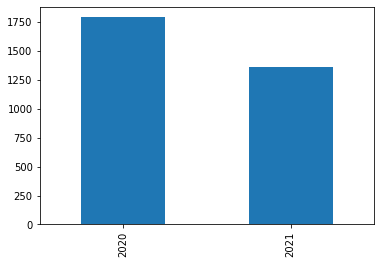

In [ ]:
df['year'].value_counts().plot(kind='bar')

# Menoume Energoi text analysis
### (dropped)

In [ ]:
text = df[df['year']==2021]['full_text'].str.cat(sep = ' ').replace('amp', ' ')
text = text.replace(r'https',' ')  
text

'Πριν λίγο καιρό, ο Μάριος Σαλμάς, επισκεπτόμενος το υποστελεχωμένο νοσοκομείο Αγρινίου άφησε αιχμές ότι οι γιατροί  ευθύνονται για τη κακη περίθαλψη του κόσμου. Οι γιατροί δεν σιώπησαν και ανέδειξαν τις  κυβέρνητικές ευθύνες,  που όπως φαίνεται απαγορεύεται...\n#ΜένουμεΕνεργοί ΑΠΕΙΛΗΤΙΚΟ ΤΗΛΕΦΩΝΗΜΑ\nΑπό τον βουλευτή της ΝΔ  Μάριο Σαλμά προς συνδικαλιστή γιατρό της ΟΕΝΓΕ\nΗ καταγγελία της ΟΕΝΓΕ εδώ  ://t.co/HiERjDNlpM.\n\nΤον απείλησε  με μπλεξίματα για υποθέσεις ασθενών, αν τον \'\'ξαναπιάσει στο στόμα του\'\'.  ://t.co/yew40Q4C29 Μια σημαντική κινητοποίηση για μια σημαντική δίκη αύριο το πρωί στα δικαστήρια στο Ηράκλειο Κρήτης.\n#ΜένουμεΕνεργοι #ergnews  ://t.co/vtmjQzgQ7l Οι πανελλαδικές εξετάσεις πλησιάζουν και το άγχος για τους υποψηφίους φουντώνει.Δεν πρόκειται για το "παραδοσιακό" άγχος των πανελληνίων, καθώς η κυβέρνηση φρόντισε με τους νόμους της να θεσπίσει ακόμα πιο αυστηρά κριτήρια εισαγωγής.\nΔείτε  ://t.co/m7tMdmJ62F\n#ΜένουμεΕνεργοί  ://t.co/jSwthlosAe Παγκόσμια Ημέρα Πε

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

NameError: ignored

In [ ]:
doc = nlp(df['full_text'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

Δημοσιεύθηκε δημοσιεύθηκε
η η
προκήρυξη προκήρυξη
θέσεων θέσεα
για για
την την
πανεπιστημιακή πανεπιστημιακός
αστυνομία αστυνομία
. .
Διαβάζοντας διαβάζω
κανείς κανείς
την την
προκήρυξη προκήρυξη
διαπιστώνει διαπιστώνω
πως πως
δίνονται δίνομαι
επιπλέον επιπλέον
μόρια μόριο
σε σε
Επαγγελματίες επαγγελματίε
Οπλίτες οπλίτε
& &
amp amp
; ;
ανθρώπους ανθρώπου
των των
Ειδικών ειδικός
Δυνάμεων δυνάμεα
! !
Κοινώς κοινώς
θα θα
βάλουν βάλω
μέχρι μέχρι
πρότινος πρότινος
στρατιωτικούς στρατιωτικού
να να
φυλάνε φυλώ
τα τα
πανεπιστημιακά πανεπιστημιακά
ιδρύματα ιδρύμαα
. .
https://t.co/9tMmPZRSk7 https://t.co/9tmmpzrsk7


In [ ]:
' '.join(token.lemma_ for token in doc)

'δημοσιεύθηκε η προκήρυξη θέσεα για την πανεπιστημιακός αστυνομία . διαβάζω κανείς την προκήρυξη διαπιστώνω πως δίνομαι επιπλέον μόριο σε επαγγελματίε οπλίτε & amp ; ανθρώπου των ειδικός δυνάμεα ! κοινώς θα βάλω μέχρι πρότινος στρατιωτικού να φυλώ τα πανεπιστημιακά ιδρύμαα . https://t.co/9tmmpzrsk7'

In [ ]:
full_doc = nlp(text)

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text[200:400]

'ιπλέον μόριο σε επαγγελματίε οπλίτε & ; ανθρώπου των ειδικός δυνάμεα ! κοινώς θα βάλω μέχρι πρότινος στρατιωτικού να φυλώ τα πανεπιστημιακά ιδρύμαα .   : //t.co/9tmmpzrsk7 rt @attack_against : ‼️διήμε'

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(df['full_text'])

In [ ]:
count_vector.shape

(3148, 16845)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)
#min df ειναι δε θελω λεξεις με πολυ μικρη συχνοτητα.

In [ ]:
count_vector = cv.fit_transform(df['full_text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()


00  10  11  12  16  ...  χρυσοχοιδη_παραιτησου  χώρα  χώρας  χώρο  ώρα
0   0   0   0   0   0  ...                      0     0      0     0    0
1   0   0   0   0   0  ...                      0     0      0     0    0
2   0   0   0   0   0  ...                      0     0      0     0    0
3   0   0   0   0   0  ...                      0     0      0     0    0
4   0   0   0   0   0  ...                      0     0      0     0    0

[5 rows x 177 columns]

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['full_text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκαστας', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικας', 'αλλοιώτικας', 'αφότο', 'βεβαιόταα', 'γρήγορας', 'δίχω', 'εαυτά', 'εκάστο', 'ευθύ', 'εχτή', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποιή', 'ποιώ', 'πολλός', 'προχθή', 'προχτέ', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'συχνέ', 'ταύτο', 'τούτε', 'όσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


\n\n   ...  @chris_avramidis  @georgemourmour2  ...  χρόνο  χώρα  χώρο  ώρα
0      0    0                 0                 0  ...      0     0     0    0
1      0    0                 0                 0  ...      0     0     0    0
2      0    0                 0                 0  ...      0     0     0    0
3      0    0                 0                 0  ...      0     0     0    0
4      0    0                 0                 0  ...      0     0     0    0

[5 rows x 186 columns]

# Twitter query-based scraping - 150 EUR
### ( use for article)

In [ ]:
### Code SOURCE LINK - https://github.com/datajour-gr/Data_journalism/blob/master/scraping/read_%26_save_tweets_search_colab.ipynb   ########

In [ ]:
from datetime import timedelta
from datetime import datetime as dt

In [ ]:
!pip install Twython
from twython import Twython

CONSUMER_KEY = "moGbJUrmr1d3IcDhaaJxQ72lc"
CONSUMER_SECRET = "m12HK0zHc2HgIePNjeMzZn8z80oyJEMcypsVrHSIJA3eBKa0Pw"
OAUTH_TOKEN = "1166254978480128002-RVb5mYtTjBWP3doZW6kVhKAn0B5Ue8"
OAUTH_TOKEN_SECRET = "wwsyxMoVJC6Pm3SLW9KhhxST3Gs95FmC30oh7BLjvvXRo"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [ ]:
tweets = []
MAX_ATTEMPTS = 40
COUNT_OF_TWEETS_TO_BE_FETCHED = 3800 

for i in range(0,MAX_ATTEMPTS):

    if(COUNT_OF_TWEETS_TO_BE_FETCHED < len(tweets)):
        print("We Got ", len(tweets), " tweets.")
        break # we got the  tweets... !!

    #----------------------------------------------------------------#
    # STEP 1: Query Twitter
    # STEP 2: Save the returned tweets
    # STEP 3: Get the next max_id
    #----------------------------------------------------------------#

    # STEP 1: Query Twitter
    if(0 == i):
        # Query twitter for data. 
        results = twitter.search(q="150_ευρω",count='100')
        print("I Got:", len(results['statuses']), " tweets")
    else:
        # After the first call we should have max_id from result of previous call. Pass it in query.
        results = twitter.search(q="150_ευρω",count='100', include_entities='true',max_id=next_max_id)
        print("I Got:", len(results['statuses']), " tweets")


    # STEP 2: Save the returned tweets
    for result in results['statuses']:
#        tweet_text = result['text']
        tweets.append(result)


    # STEP 3: Get the next max_id
    try:
        # Parse the data returned to get max_id to be passed in consequent call.
        next_results_url_params = results['search_metadata']['next_results']
        next_max_id = next_results_url_params.split('max_id=')[1].split('&')[0]
    except:
        break

In [ ]:
tweets = pd.DataFrame(tweets)
tweets

In [ ]:
tweets.head()

In [ ]:
df = tweets[['created_at','text', 'lang', 'retweet_count']]

In [ ]:
tweets_df_q 

In [ ]:
tweets_df_q['text'][2]

'RT @Foteini78580217: "Εξαερώθηκε" η ανοσία στο #Ισραήλ - "Κούφιο" το εμβόλιο #Pfizer/#Biontech \n\nhttps://t.co/pxV2AbYT3L μέσω @YouTube \n \n#…'

In [ ]:
tweets_df_q[tweets_df_q['lang'] == "el"].value_counts()
#αναμενόμενο τα περισσότερα ειναι στα ελληνικα

created_at                      text                                                                                                                                               lang  retweet_count
Wed Jun 30 20:48:36 +0000 2021  RT @VasoKouk: Ρισκάρεις την ζωή σου για 150 Ευρώ ; https://t.co/kbSsjmJzA6                                                                         el    13               2
Thu Jul 01 23:24:12 +0000 2021  RT @Thanos32457198: Ρε @P_Kiamos Κιάμο,σού´χουν πει ότι οι 90χρονοι ΔΕΝ ακούνε Κιάμο‼️\nΕλπίζουμε ΝΑ ΤΟ ΚΛΕΙΣΕΙΣ ΣΥΝΤΟΜΑ το χαμαιτυπείο σου…       el    3                2
Wed Jun 30 23:58:01 +0000 2021  RT @demina: Πανηλίθιοι #διπλής #150_ευρω #προνόμια #κυβερνηση_καρναβαλι #Κυβέρνηση_Μητσοτάκη https://t.co/FQZNqhR54F                               el    5                1
Sat Jul 03 16:42:11 +0000 2021  @tovimagr Πρέπει να βγούνε και τα 150 ευρώ που έταξε ο πολιτικός κρατούμενος στους νέους ώστε να εμβολιαστούν.                                     el    0   

In [ ]:
tweets_df_q[tweets_df_q['lang'] == "en"].value_counts()
# αυτα στα αγγλικά φαίνονται άσχετα

created_at                      text                                                                                                                                          lang  retweet_count
Wed Jun 30 21:21:55 +0000 2021  RT @beacon_freedom: Blast from the past! #150_ευρω                                                                                            en    1                1
Wed Jun 30 19:23:30 +0000 2021  Blast from the past! #150_ευρω https://t.co/HQ19MIspnL                                                                                        en    1                1
Wed Jun 30 12:57:51 +0000 2021  RT @nakomiGIANNIS: 3...2...1...action   #προνομια #150_ευρω #εμβολια #μασκες https://t.co/DIHioq1Chv                                          en    6                1
Wed Jun 30 11:00:26 +0000 2021  RT @sw4ggyb1tch: this didn't age well... #150_ευρω #κυβερνηση_καρναβαλι #τι_ψηφισατε_ρε_μαλακες                                               en    2                1
Wed Jun 30

In [ ]:
#tweets_df_q['lang'] = tweets_df_q[tweets_df_q['lang'] == "el"]
#tweets_df_q.drop(index, inplace=True)
#subset = tweets_df_q[tweets_df_q['lang'] == 'en']              /// check later to remove EN, there is a problem with format

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
tweets_df_q.to_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_2.tsv", sep='\t')   ## this time I;m making a back-up version

In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_2.tsv", sep='\t')

In [ ]:
df

In [ ]:
#df.dropna()

In [ ]:
df['created_at']

In [ ]:
#df = df.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])  ## wow. scrap the rest.

In [ ]:
df['created_at']

In [ ]:
#df.to_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_3.tsv", sep='\t')   ## 3rd version with datetime

In [ ]:
#df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_3.tsv", sep='\t')

In [ ]:
df.dropna()
df.tail()

Unnamed: 0                      created_at  ... lang retweet_count
3895        3895  Tue Jun 29 17:21:47 +0000 2021  ...   el           166
3896        3896  Tue Jun 29 17:21:46 +0000 2021  ...   el             7
3897        3897  Tue Jun 29 17:21:45 +0000 2021  ...   el            41
3898        3898  Tue Jun 29 17:21:30 +0000 2021  ...   el           126
3899        3899  Tue Jun 29 17:21:29 +0000 2021  ...   el             1

[5 rows x 5 columns]

In [ ]:
#df.get('created_at')

In [ ]:
# indexing based on Time
#df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_2.tsv", sep='\t', index_col ="created_at")
#df

In [ ]:
pd.to_datetime(df['created_at'])

In [ ]:
df['created_at'].dt.time(format='%a %b %d %H:%M:%S +0000 %Y')

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'],format='%a %b %d %H:%M:%S +0000 %Y')  # Length of values (1) does not match length of index (3900)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['created_at']

0      2021-06-30 21:20:56+00:00
1      2021-06-30 21:20:05+00:00
2      2021-06-30 21:19:30+00:00
3      2021-06-30 21:18:56+00:00
4      2021-06-30 21:17:49+00:00
                  ...           
3895   2021-06-29 17:21:47+00:00
3896   2021-06-29 17:21:46+00:00
3897   2021-06-29 17:21:45+00:00
3898   2021-06-29 17:21:30+00:00
3899   2021-06-29 17:21:29+00:00
Name: created_at, Length: 3900, dtype: datetime64[ns, UTC]

In [ ]:
#df['created_at'] = pd.Series()

In [ ]:
df.dtypes

Unnamed: 0                     int64
created_at       datetime64[ns, UTC]
text                          object
lang                          object
retweet_count                  int64
dtype: object

In [ ]:
df['text'][300:400]

created_at
2021-06-30 17:33:27+00:00    RT @30__kai: #150_ευρω σε όποιον βρει μια σταθ...
2021-06-30 17:33:12+00:00    RT @Amorchaos2: Τρελάθηκαν οι ψεκασμένοι με τα...
2021-06-30 17:33:10+00:00                            RT @dim70: 3x #150_ευρω  
2021-06-30 17:30:44+00:00      RT @nayiahal: Προβλέπω βεντέτες για τα 150 ευρώ
2021-06-30 17:30:39+00:00    RT @karvounopoulosp: Η Aegean στην οποία δώσαμ...
                                                   ...                        
2021-06-30 16:42:22+00:00    Ο αγνώστου φύλου κ ονόματος troll 0,60€/tweet ...
2021-06-30 16:41:58+00:00    RT @Silver_Spidey: Δλδ φταίει η κυβέρνηση που ...
2021-06-30 16:41:45+00:00    RT @MELETOPOULOS1: Η απόφαση εμβολιασμού δεν μ...
2021-06-30 16:40:25+00:00    RT @VePZVughT9Iapw2: Ζω στη χωρα που χτες μοιρ...
2021-06-30 16:39:58+00:00    RT @karvounopoulosp: Η Aegean στην οποία δώσαμ...
Name: text, Length: 100, dtype: object

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

In [ ]:
df[df['text'].str.contains('στοχοποίηση')]

Unnamed: 0                created_at  ... lang retweet_count
19            19 2021-06-30 21:06:46+00:00  ...   el            12
204          204 2021-06-30 18:46:16+00:00  ...   el           210
1334        1334 2021-06-30 09:38:06+00:00  ...   el            12
1522        1522 2021-06-30 08:16:33+00:00  ...   el            12
1634        1634 2021-06-30 07:21:45+00:00  ...   el            12
1642        1642 2021-06-30 07:17:50+00:00  ...   el            12
2120        2120 2021-06-30 03:12:25+00:00  ...   el            12
2230        2230 2021-06-30 00:16:24+00:00  ...   el             0
3355        3355 2021-06-29 19:18:12+00:00  ...   el            12
3390        3390 2021-06-29 19:11:08+00:00  ...   el            12
3408        3408 2021-06-29 19:08:19+00:00  ...   el            12
3409        3409 2021-06-29 19:08:18+00:00  ...   el            12
3425        3425 2021-06-29 19:06:11+00:00  ...   el            12

[13 rows x 5 columns]

In [ ]:
df['text'].str.contains('στοχοποίηση').value_counts()

False    3887
True       13
Name: text, dtype: int64

In [ ]:
#tosplit = df['created_at'].str.split(" ", expand = True)

In [ ]:
#tosplit 

In [ ]:
#df['date'] = tosplit[0]
#df['time'] = tosplit[1]

In [ ]:
####### το πρόβλημα είανι οτι όλα ειναι από την ίδια μερα και δεν εχει νοημα να χρησιμοποιησω το date.  μόνο το time. πρεπει να ειναι σε datetime.....   df['time'] = pd.to_datetime(df['time'])

# Twitter 150 EUR - text analysis

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import spacy
!python -m spacy download el_core_news_sm

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df.tsv", sep='\t')

In [ ]:
df['text'] 

0       RT @NWOgohome: Παιδιά των 18-25, σκεφτείτε ότι...
1       RT @antsket: Δεν κάναμε το εμβόλιο, παλιομαλάκ...
2       RT @miltostr: Ωραία αντανακλαστικά η Aegean πο...
3       RT @akrokentrwos_2: Ο άλλος γράφει στο ινσταγκ...
4       RT @5T2qxt3ggNIwm9n: Οταν σε κυνηγανε οι μ@λ@κ...
                              ...                        
3895    RT @ChrisHolgersson: #150_ευρώ https://t.co/Rk...
3896    RT @skourkos2012: Σπιτικό σπρώξε γλύψε, κεράσι...
3897    Τα παιδιά του ντελιβερι μεγάλης αλυσίδας καφέ ...
3898    New post (“Μόνο ένας τυχάρπαστος πολιτικός εγκ...
3899    RT @EOM_memes: Άσε ρε πονηρέ... 150 ευρώ απο τ...
Name: text, Length: 3900, dtype: object

In [ ]:
textq = df['text'].str.cat(sep = ' ').replace('RT', ' ')
textq = textq.replace(r'https',' ')  
textq = textq.replace(r'://t.co', ' ')
textq = textq.replace('https', ' ')
textq = textq.replace('co', ' ')
#textq = textq.replace(r '^(.*?', ' ')
#textq = textq.replace(r '@'(.*), ' ')
#textq = textq.replace(r '(@.*), ' ')
#textq = textq.replace(ur'(^@.*? [\xe2] )?(.*)', str)
#textq = textq.replace(r'^@(.+)', ' ',) 
#textq = textq.replace(r'^(@(.+))', ' ',) 
#textq = textq.replace(r'@\S+|https?://\S+', '',)
 #textq = textq.replace(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ")
#textq = re.sub(r'@\S+|https?://\S+', '', textq)
textq 


# Can't get rid of @sdfalsdjkghdkrg

'  @NWOgohome: Παιδιά των 18-25, σκεφτείτε ότι ο πθ της χώρας σας κουνάει επιδεικτικά 150 ευρώ για να κάνετε στο σώμα σας κάτι που ως τώρα…   @antsket: Δεν κάναμε το εμβόλιο, παλιομαλάκα Μητσοτάκη, για να  μας κάνεις τους λευκούς στη Νότια Αφρική του απαρτχάιντ. Βάλε στον κωλο…   @miltostr: Ωραία αντανακλαστικά η Aegean που κάνει 300 ευρώ τα 150, θα ήταν ωραίο να τα χρησιμοποιούσε και πέρυσι όταν ξεφτιλιζόταν δίνο…   @akrokentrwos_2: Ο άλλος γράφει στο ινσταγκραμ ότι δίνει στους νέους 150 ευρώ επειδή και τα 3 παιδιά του είναι μέσα σε αυτές τις ηλικίες…   @5T2qxt3ggNIwm9n: Οταν σε κυνηγανε οι μ@λ@κιες που εχεις πει 😂🤣😂🤣 #150_ευρω   /uidpXGRhfh   @ChefTalias: Τί να κλάσουν τα 150 ευρώ ανταμοιβή, έχω προλάβει μετά το μαντού να μοιράζουν στα σχολεία δίκιλο χυμό ροδάκινο   @ManosVoularinos: Ναι ξέρω, με ΠΑΣΟΚ τόσα δίναμε για πουρμπουάρ στον ντελιβερα. Γι\' αυτό τώρα χρωστάμε τον κ@λο μας #150_ευρω   @iosif3rd: Οφείλω να παραδεχτώ ότι τα #150_ευρω είναι ένα καλό κίνητρο για τους 18-25 να βγά

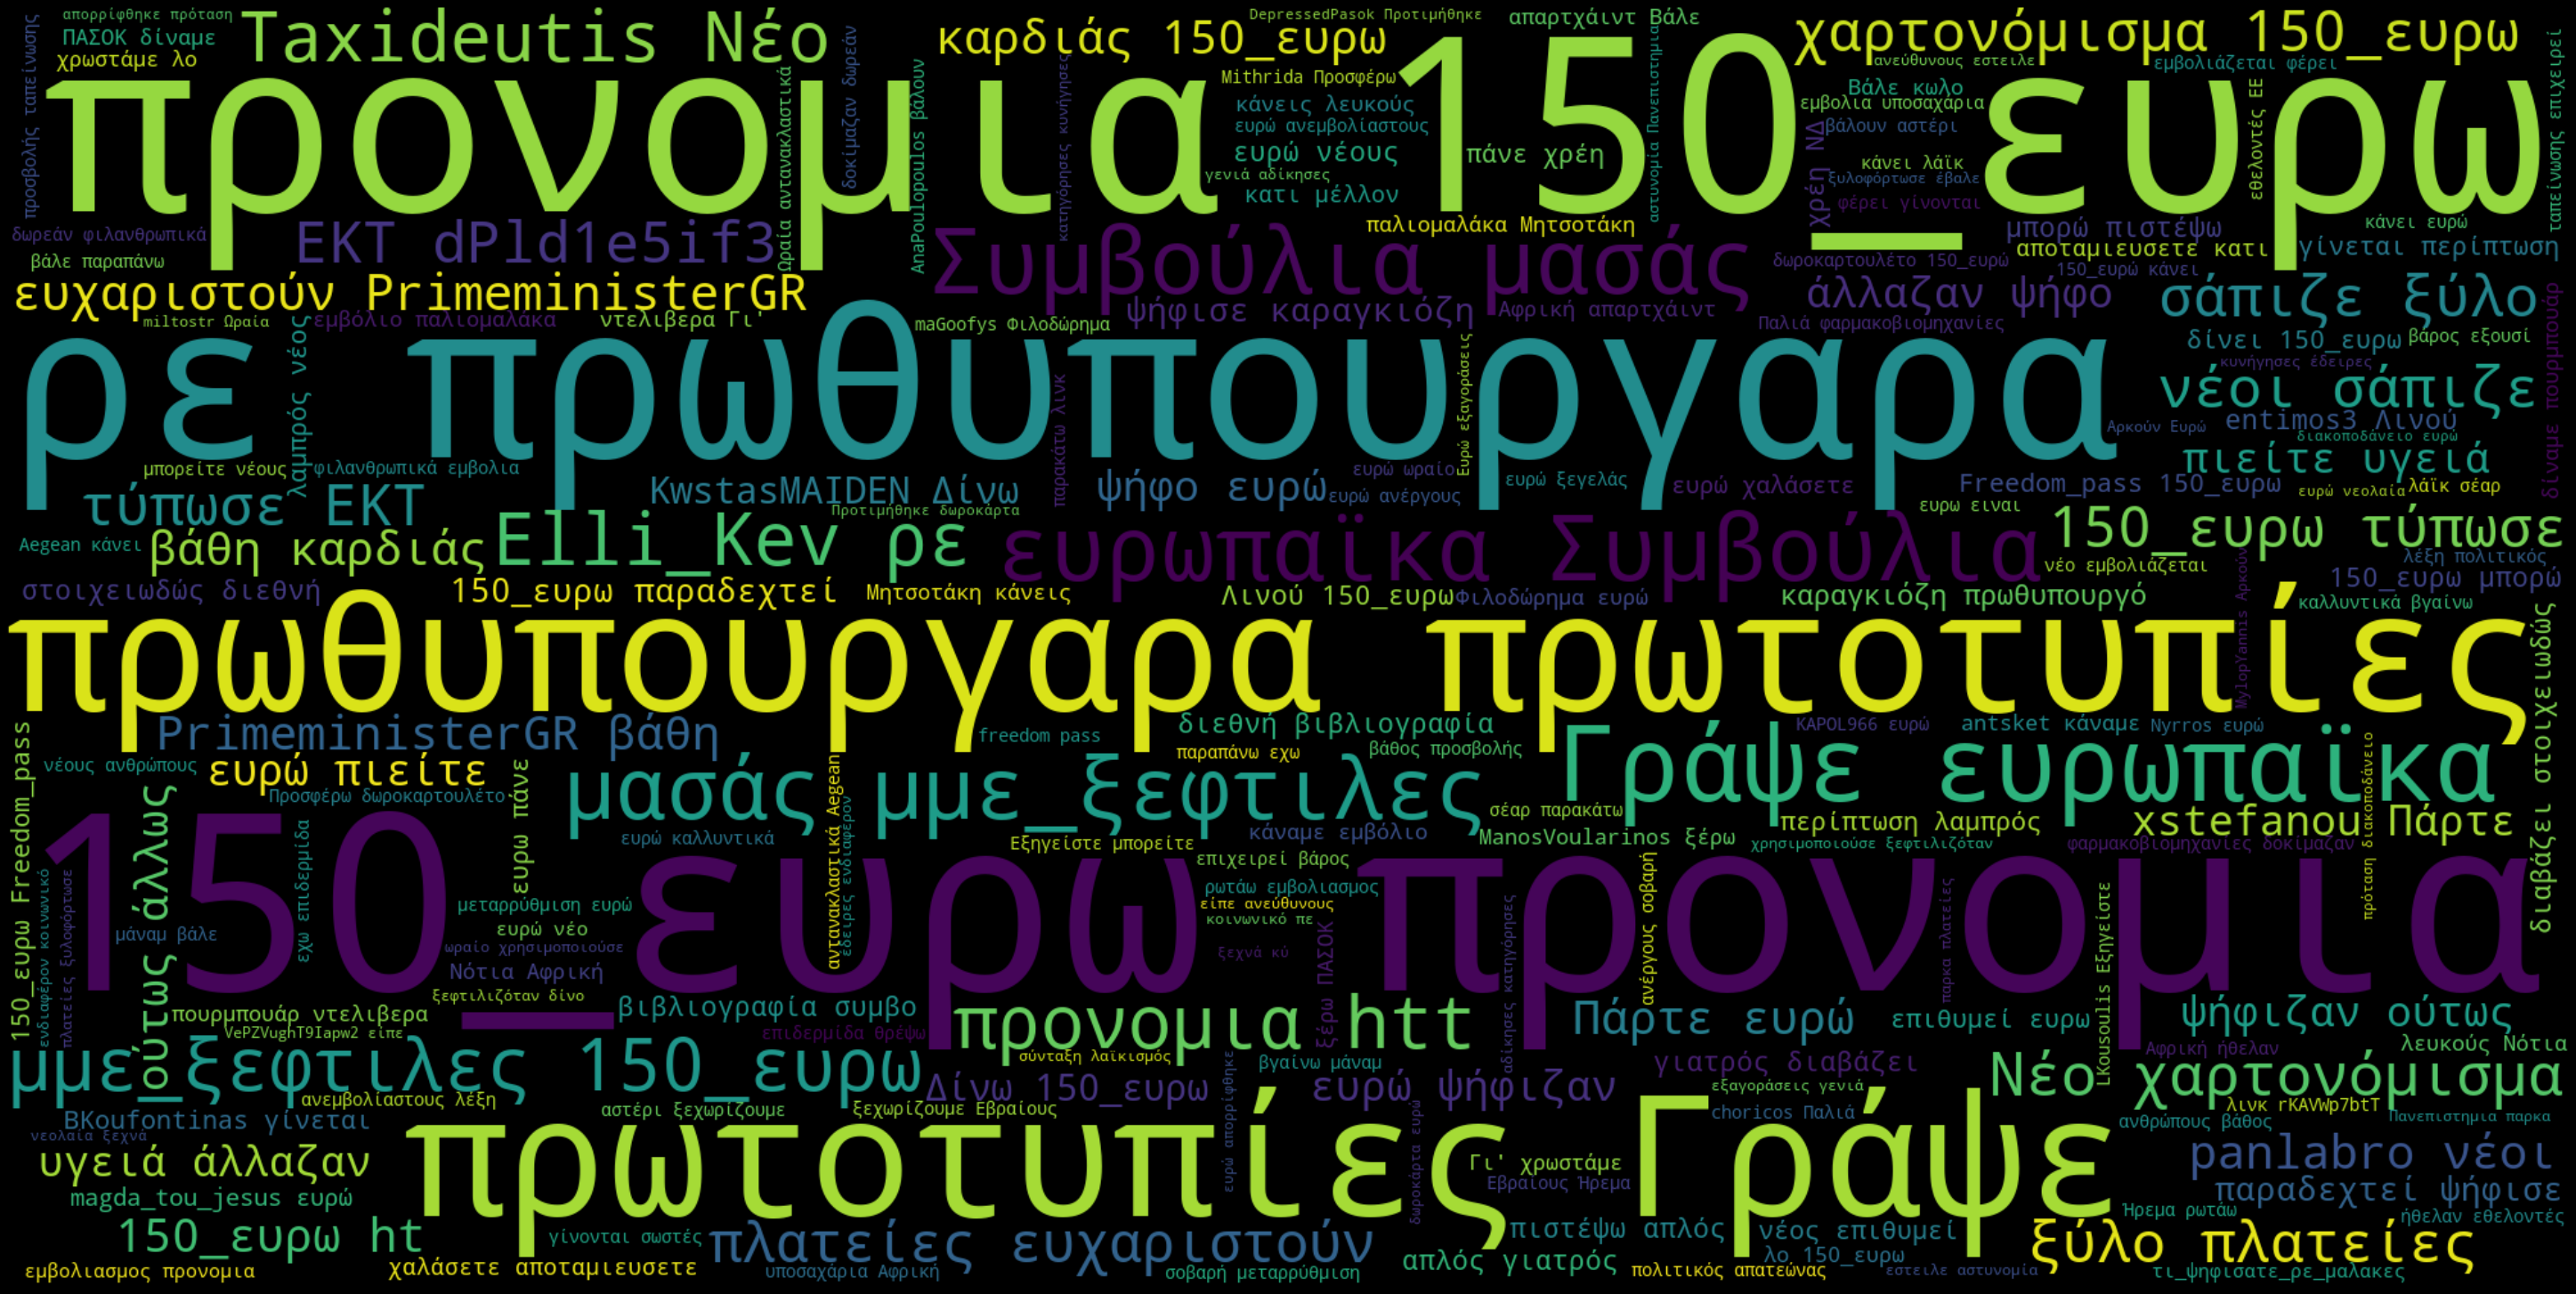

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(textq)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Vectorization - 150 Twitter

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)
#min df ειναι δε θελω λεξεις με πολυ μικρη συχνοτητα.

In [ ]:
count_vector = cv.fit_transform(df['text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) )
count_vector = cv.fit_transform(df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

150 ευρω  150 ευρώ  ...  ρε πρωθυπουργαρα  συμβούλια μασάς
0         0         1  ...                 0                0
1         0         0  ...                 0                0
2         0         0  ...                 0                0
3         0         1  ...                 0                0
4         0         0  ...                 0                0

[5 rows x 20 columns]

In [ ]:
print(count_vector)#.toarray())

In [ ]:
print(count_vector.toarray().sum(axis=0))

[ 158 1042  215  121  167   93 1168   93   91   92   94   94   94   94
  119   93   94   94   94   94]


In [ ]:
results.sum(axis =0).sort_values(ascending = False)

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(15)    ################################ ONLY THING TO ADDDDDDDD ##################

https co                     1168
150 ευρώ                     1042
150_ευρω https                215
18 25                         167
150 ευρω                      158
150_ευρω προνομια             121
προνομια 150_ευρω             119
γράψε ευρωπαϊκα                94
ρε πρωθυπουργαρα               94
συμβούλια μασάς                94
ευρωπαϊκα συμβούλια            94
μασάς μμε_ξεφτιλες             94
μμε_ξεφτιλες 150_ευρω          94
πρωθυπουργαρα πρωτοτυπίες      94
πρωτοτυπίες γράψε              94
dtype: int64

In [ ]:
results2 = results.head(15)  ## PLOT COMMON WORDS - test later
results2

In [ ]:
#results2.sort_values(ascending = False).plot(kind = 'hist')          #.hist(by="...", bins= 30)
results2.plot.hist()

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['150', 'νέοι']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

150  νέοι
0    1     0
1    0     0
2    1     0
3    1     0
4    0     0

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  # ###########  COSINE - TEST  #### will not add 

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['text'])  #finds the tfidf score with normalization


In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

000  100  13η       150  ...  ψεκασμενους  ψηφαλακια     ωραία     ωραίο
0  0.0  0.0  0.0  0.264192  ...          0.0        0.0  0.000000  0.000000
1  0.0  0.0  0.0  0.000000  ...          0.0        0.0  0.000000  0.000000
2  0.0  0.0  0.0  0.120023  ...          0.0        0.0  0.316876  0.322108
3  0.0  0.0  0.0  0.213195  ...          0.0        0.0  0.000000  0.000000
4  0.0  0.0  0.0  0.000000  ...          0.0        0.0  0.000000  0.000000

[5 rows x 500 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.01031117 0.07792599 ... 0.45350732 0.         0.11781131]]


In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)) 

cosine scores ==>  [[1.         0.01031117 0.07792599 ... 0.45350732 0.         0.11781131]
 [0.01031117 1.         0.00468439 ... 0.         0.         0.00708203]
 [0.07792599 0.00468439 1.         ... 0.         0.         0.05352197]
 ...
 [0.45350732 0.         0.         ... 1.         0.14711731 0.07675337]
 [0.         0.         0.         ... 0.14711731 1.         0.13098028]
 [0.11781131 0.00708203 0.05352197 ... 0.07675337 0.13098028 1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

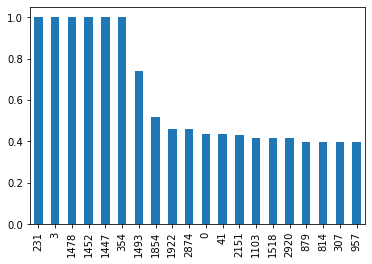

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

# Sentiment analysis - 150
### datetime needed (fixed)

In [ ]:
# source = https://github.com/datajour-gr/Data_journalism/blob/master/week10/Sentiment_analysis_GREEK.ipynb

In [ ]:
!python -m spacy download el_core_news_sm  # Libraries in case we need to re-import

In [3]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [5]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

In [7]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [ ]:
emolex_df.tail()

In [9]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_2.tsv", sep='\t')

In [10]:
df['created_at'] = pd.to_datetime(df['created_at'])  ## Datetime conversion as previously

In [12]:
df['text'] = df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [13]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(df['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

In [ ]:
wordcount_df.shape

In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

In [18]:
# lists with the types of words

angry_words = emolex_df[emolex_df.Anger == 1]['word']
positive_words = emolex_df[emolex_df.Positive == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [19]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)
df['positivity'] = wordcount_df[positive_words].sum(axis=1)
df['joy'] = wordcount_df[joy_words].sum(axis=1)
df['disgust'] = wordcount_df[disgust_words].sum(axis=1)
df['surprise'] = wordcount_df[surprise_words].sum(axis=1)
df['trust'] = wordcount_df[trust_words].sum(axis=1)
df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
df['sadness'] = wordcount_df[sadness_words].sum(axis=1)
df['negative'] = wordcount_df[negative_words].sum(axis=1)
df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [20]:
df.set_index('created_at' , inplace=True)

In [71]:
df[200:300]

Unnamed: 0  ... fear
created_at                             ...     
2021-06-30 18:47:34+00:00         200  ...    0
2021-06-30 18:47:17+00:00         201  ...    0
2021-06-30 18:46:59+00:00         202  ...    0
2021-06-30 18:46:18+00:00         203  ...    0
2021-06-30 18:46:16+00:00         204  ...    0
...                               ...  ...  ...
2021-06-30 17:35:00+00:00         295  ...    0
2021-06-30 17:34:03+00:00         296  ...    0
2021-06-30 17:33:58+00:00         297  ...    0
2021-06-30 17:33:43+00:00         298  ...    1
2021-06-30 17:33:30+00:00         299  ...    0

[100 rows x 14 columns]

In [ ]:
df.dtypes

In [48]:
#popularones = df[df['retweet_count'] > 100]['text']

In [47]:
df[df['retweet_count'] > 100]['text'].value_counts

<bound method IndexOpsMixin.value_counts of created_at
2021-06-30 21:20:05+00:00    RT @karvounopoulosp: Η Aegean στην οποία δώσαμ...
2021-06-30 21:17:29+00:00    RT @karvounopoulosp: Η Aegean στην οποία δώσαμ...
2021-06-30 21:09:33+00:00    RT @karvounopoulosp: Η Aegean στην οποία δώσαμ...
2021-06-30 21:08:14+00:00    RT @karvounopoulosp: Η Aegean στην οποία δώσαμ...
2021-06-30 20:36:53+00:00    RT @karvounopoulosp: Η Aegean στην οποία δώσαμ...
                                                   ...                        
2021-06-29 17:23:47+00:00    RT @iosif3rd: Το κάθε τουι πρέπει να αρτάρεται...
2021-06-29 17:23:31+00:00    RT @Elli_Kev: Α ρε πρωθυπουργαρα με τις πρωτοτ...
2021-06-29 17:22:26+00:00    RT @KwstasMAIDEN: Δίνω #150_ευρω σε όποιον παρ...
2021-06-29 17:21:47+00:00    RT @MylopYannis: Αρκούν 150 Ευρώ για να εξαγορ...
2021-06-29 17:21:30+00:00    RT @PGPapanikolaou: Το καραγκιοζιλίκι Μητσοτάκ...
Name: text, Length: 855, dtype: object>

In [82]:
df[df['anger'] == 1]['text']

created_at
2021-06-30 21:17:13+00:00    RT @VePZVughT9Iapw2: Ζω στη χωρα που χτες μοιρ...
2021-06-30 21:15:05+00:00    RT @PoytinaIrina: Θαύμα ελληνικής οικονομίας, ...
2021-06-30 21:14:29+00:00    RT @VePZVughT9Iapw2: Ζω στη χωρα που χτες μοιρ...
2021-06-30 20:59:30+00:00    RT @VePZVughT9Iapw2: Ζω στη χωρα που χτες μοιρ...
2021-06-30 20:56:30+00:00    RT @VePZVughT9Iapw2: Ζω στη χωρα που χτες μοιρ...
                                                   ...                        
2021-06-29 17:40:43+00:00    RT @stef_an: Για κάτι μήνες του λέω χάνω τα 15...
2021-06-29 17:36:00+00:00    RT @Makedni: Πρωτα φτωχοποιησατε τον Ελληνικο ...
2021-06-29 17:31:55+00:00    @NodarasSpiros Γουστάρω αντίσκηνο ρε κουράδα. ...
2021-06-29 17:31:46+00:00    RT @young3_forever: #150_ευρω...Εάν κοστολογεί...
2021-06-29 17:27:09+00:00    RT @maGoofys: Φιλοδώρημα τα 400 ευρώ στους ανέ...
Name: text, Length: 421, dtype: object

In [24]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

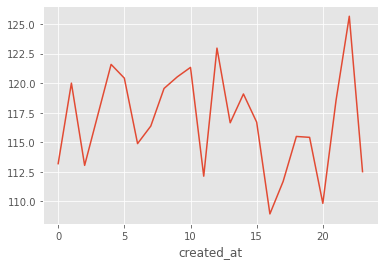

In [77]:
df['text'].str.len().groupby(by=df.index.hour).mean().plot()  # μεσος αριθμος χαρακτήρων tweet ανά ώρα της ημέρας

In [ ]:
df['text'].str.len().mean()

116.33692307692307

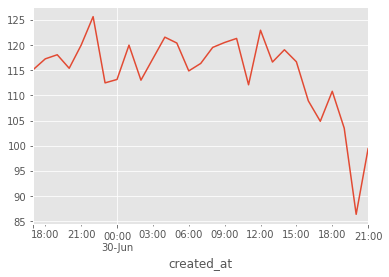

In [58]:
df['text'].str.len().resample('H').mean().plot()   # resample link - https://stackoverflow.com/questions/17001389/pandas-resample-documentation/17001474#17001474

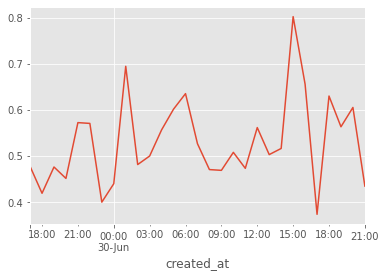

In [74]:
df['positivity'].resample('H').mean().plot()  #sum()

In [70]:
df['anger'].sum()

746

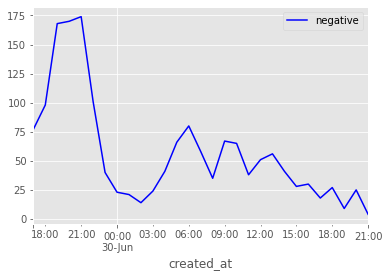

In [72]:
df['negative'].resample('H').sum().plot(color = 'b',label = 'negative').legend()

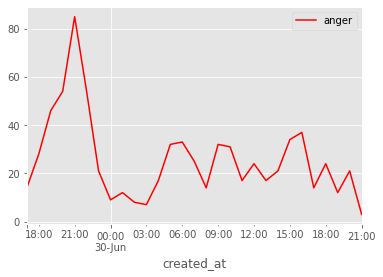

In [81]:
df['anger'].resample('H').sum().plot(color='r', label = 'anger').legend()  #figsize=(16,4))

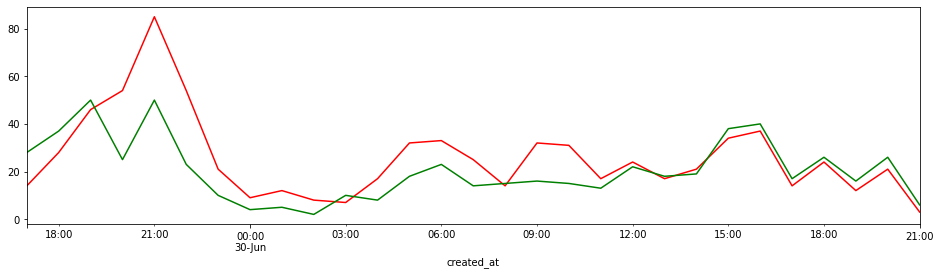

In [ ]:
ax = df['anger'].resample('H').sum().plot(figsize=(16,4), color = 'red')
df['joy'].resample('H').sum().plot(figsize=(16,4), ax = ax, color = 'green')

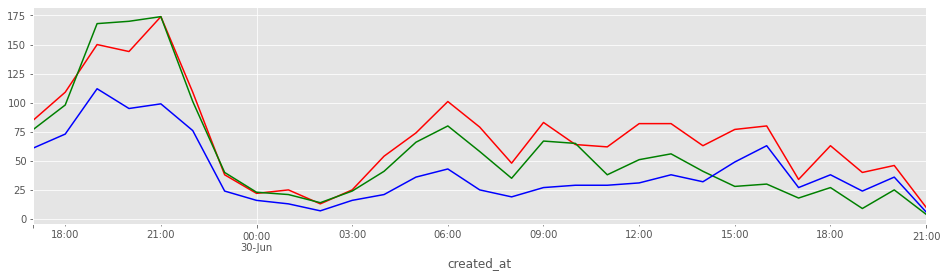

In [83]:
ax = df['positivity'].resample('H').sum().plot(figsize=(16,4), color = 'red')
df['negative'].resample('H').sum().plot(figsize=(16,4), ax = ax, color = 'green')
df['trust'].resample('H').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

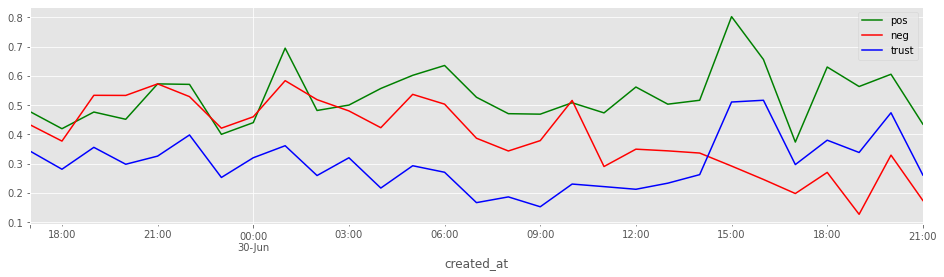

In [ ]:
ax = df['positivity'].resample('H').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
df['negative'].resample('H').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
df['trust'].resample('H').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

# Twitter query-based scraping - vaccines


In [ ]:

################## Code SOURCE LINK - https://github.com/datajour-gr/Data_journalism/blob/master/scraping/read_%26_save_tweets_search_colab.ipynb   ########


In [ ]:
from datetime import timedelta
from datetime import datetime as dt

In [ ]:
!pip install Twython
from twython import Twython

CONSUMER_KEY = "moGbJUrmr1d3IcDhaaJxQ72lc"
CONSUMER_SECRET = "m12HK0zHc2HgIePNjeMzZn8z80oyJEMcypsVrHSIJA3eBKa0Pw"
OAUTH_TOKEN = "1166254978480128002-RVb5mYtTjBWP3doZW6kVhKAn0B5Ue8"
OAUTH_TOKEN_SECRET = "wwsyxMoVJC6Pm3SLW9KhhxST3Gs95FmC30oh7BLjvvXRo"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [ ]:
tweets = []
MAX_ATTEMPTS = 40
COUNT_OF_TWEETS_TO_BE_FETCHED = 3800 

for i in range(0,MAX_ATTEMPTS):

    if(COUNT_OF_TWEETS_TO_BE_FETCHED < len(tweets)):
        print("We Got ", len(tweets), " tweets.")
        break # we got the  tweets... !!

    #----------------------------------------------------------------#
    # STEP 1: Query Twitter
    # STEP 2: Save the returned tweets
    # STEP 3: Get the next max_id
    #----------------------------------------------------------------#

    # STEP 1: Query Twitter
    if(0 == i):
        # Query twitter for data. 
        results = twitter.search(q="Εμβολιο",count='100')
        print("I Got:", len(results['statuses']), " tweets")
    else:
        # After the first call we should have max_id from result of previous call. Pass it in query.
        results = twitter.search(q="Εμβολιο",count='100', include_entities='true',max_id=next_max_id)
        print("I Got:", len(results['statuses']), " tweets")


    # STEP 2: Save the returned tweets
    for result in results['statuses']:
#        tweet_text = result['text']
        tweets.append(result)


    # STEP 3: Get the next max_id
    try:
        # Parse the data returned to get max_id to be passed in consequent call.
        next_results_url_params = results['search_metadata']['next_results']
        next_max_id = next_results_url_params.split('max_id=')[1].split('&')[0]
    except:
        break

In [ ]:
tweets = pd.DataFrame(tweets)
tweets

created_at  ...  extended_entities
0     Mon Jul 05 15:26:00 +0000 2021  ...                NaN
1     Mon Jul 05 15:25:58 +0000 2021  ...                NaN
2     Mon Jul 05 15:25:56 +0000 2021  ...                NaN
3     Mon Jul 05 15:25:50 +0000 2021  ...                NaN
4     Mon Jul 05 15:25:50 +0000 2021  ...                NaN
...                              ...  ...                ...
3895  Mon Jul 05 07:57:35 +0000 2021  ...                NaN
3896  Mon Jul 05 07:57:27 +0000 2021  ...                NaN
3897  Mon Jul 05 07:57:22 +0000 2021  ...                NaN
3898  Mon Jul 05 07:57:22 +0000 2021  ...                NaN
3899  Mon Jul 05 07:57:02 +0000 2021  ...                NaN

[3900 rows x 30 columns]

In [ ]:
tweets.head()

created_at  ...  extended_entities
0  Mon Jul 05 15:26:00 +0000 2021  ...                NaN
1  Mon Jul 05 15:25:58 +0000 2021  ...                NaN
2  Mon Jul 05 15:25:56 +0000 2021  ...                NaN
3  Mon Jul 05 15:25:50 +0000 2021  ...                NaN
4  Mon Jul 05 15:25:50 +0000 2021  ...                NaN

[5 rows x 30 columns]

In [ ]:
tweets_df_q = tweets[['created_at','text', 'lang', 'retweet_count']]

In [ ]:
tweets_df_q 

created_at  ... retweet_count
0     Mon Jul 05 15:26:00 +0000 2021  ...             3
1     Mon Jul 05 15:25:58 +0000 2021  ...             3
2     Mon Jul 05 15:25:56 +0000 2021  ...             1
3     Mon Jul 05 15:25:50 +0000 2021  ...             0
4     Mon Jul 05 15:25:50 +0000 2021  ...             1
...                              ...  ...           ...
3895  Mon Jul 05 07:57:35 +0000 2021  ...             1
3896  Mon Jul 05 07:57:27 +0000 2021  ...             2
3897  Mon Jul 05 07:57:22 +0000 2021  ...             0
3898  Mon Jul 05 07:57:22 +0000 2021  ...            10
3899  Mon Jul 05 07:57:02 +0000 2021  ...             0

[3900 rows x 4 columns]

In [ ]:
tweets_df_q['text'][2]

'RT @Ouinston: Ρε παιδιά αν είναι να παίζετε γραμμή Πολάκη τί κάθεστε σε άλλο Κόμμα;\n\nΠηγαίνετε εκεί μαζί του να φωνάζετε ότι δεν υπάρχει πα…'

In [ ]:
tweets_df_q[tweets_df_q['lang'] == "el"].value_counts()
#αναμενόμενο τα περισσότερα ειναι στα ελληνικα

created_at                      text                                                                                                                                           lang  retweet_count
Mon Jul 05 09:53:24 +0000 2021  RT @xamana4s: Οπως σε ολα τα εμβολια ετσι και στον covid ειδαν οτι ολες οι παρενεργειες αν υπαρξουν θα υπαρξουν στη πρωτη δοση \nΣτην δευτερ…  el    57               3
Mon Jul 05 14:01:13 +0000 2021  RT @LykavitosGr: Μητσοτάκης: Το ραντεβού για το εμβόλιο είναι ραντεβού ζωής (βίντεο)  #lykavitosgr https://t.co/hUa9PLIAjA https://t.co/EO0…   el    2                2
Mon Jul 05 13:14:41 +0000 2021  RT @PrimeministerGR: Είναι στο χέρι μας να προστατέψουμε την υγεία μας. Το ραντεβού για το εμβόλιο είναι ραντεβού ζωής. Κλείστε το δικό σας…   el    148              2
Mon Jul 05 13:34:31 +0000 2021  RT @Giorgosstefano2: Κάνατε το εμβόλιο;Καλά κάνατε,δεν θέλετε να το κάνετε;Μαγκιά σας,το δάχτυλο δεν θα το κουνάει κανένας σε κανέναν,ας κά…   el    37               2
Mon J

In [ ]:
tweets_df_q[tweets_df_q['lang'] == "en"].value_counts()
# αυτα στα αγγλικά φαίνονται άσχετα

created_at                      text                                                                                                lang  retweet_count
Mon Jul 05 12:16:18 +0000 2021  RT @lovotomimenos21: Listen, Share RT and # #εμβολια #ΕΜΒΟΛΙΑΣΜΟΙ #Εμβολιο https://t.co/cHaZv3I5cP  en    1                1
Mon Jul 05 11:30:21 +0000 2021  Listen, Share RT and # #εμβολια #ΕΜΒΟΛΙΑΣΜΟΙ #Εμβολιο https://t.co/cHaZv3I5cP                       en    1                1
dtype: int64

In [ ]:
#tweets_df_q['lang'] = tweets_df_q[tweets_df_q['lang'] == "el"]
#tweets_df_q.drop(index, inplace=True)
#subset = tweets_df_q[tweets_df_q['lang'] == 'en']              /// check later to remove EN, there is a problem with format

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
tweets_df_q.to_csv("/content/gdrive/My Drive/Colab Notebooks/Emvolio_twitter.tsv", sep='\t')   ## this time I;m making a back-up version

In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Emvolio_twitter.tsv", sep='\t')

In [ ]:
df

Unnamed: 0                      created_at  ... lang retweet_count
0              0  Mon Jul 05 15:26:00 +0000 2021  ...   el             3
1              1  Mon Jul 05 15:25:58 +0000 2021  ...   el             3
2              2  Mon Jul 05 15:25:56 +0000 2021  ...   el             1
3              3  Mon Jul 05 15:25:50 +0000 2021  ...   el             0
4              4  Mon Jul 05 15:25:50 +0000 2021  ...   el             1
...          ...                             ...  ...  ...           ...
3895        3895  Mon Jul 05 07:57:35 +0000 2021  ...   el             1
3896        3896  Mon Jul 05 07:57:27 +0000 2021  ...  und             2
3897        3897  Mon Jul 05 07:57:22 +0000 2021  ...   el             0
3898        3898  Mon Jul 05 07:57:22 +0000 2021  ...   el            10
3899        3899  Mon Jul 05 07:57:02 +0000 2021  ...   el             0

[3900 rows x 5 columns]

In [ ]:
df['created_at']

0       Mon Jul 05 15:26:00 +0000 2021
1       Mon Jul 05 15:25:58 +0000 2021
2       Mon Jul 05 15:25:56 +0000 2021
3       Mon Jul 05 15:25:50 +0000 2021
4       Mon Jul 05 15:25:50 +0000 2021
                     ...              
3895    Mon Jul 05 07:57:35 +0000 2021
3896    Mon Jul 05 07:57:27 +0000 2021
3897    Mon Jul 05 07:57:22 +0000 2021
3898    Mon Jul 05 07:57:22 +0000 2021
3899    Mon Jul 05 07:57:02 +0000 2021
Name: created_at, Length: 3900, dtype: object

In [ ]:
#df = df.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

In [ ]:
df.dropna()
df.tail()

Unnamed: 0                      created_at  ... lang retweet_count
3895        3895  Mon Jul 05 07:57:35 +0000 2021  ...   el             1
3896        3896  Mon Jul 05 07:57:27 +0000 2021  ...  und             2
3897        3897  Mon Jul 05 07:57:22 +0000 2021  ...   el             0
3898        3898  Mon Jul 05 07:57:22 +0000 2021  ...   el            10
3899        3899  Mon Jul 05 07:57:02 +0000 2021  ...   el             0

[5 rows x 5 columns]

In [ ]:
# indexing based on Time
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Emvolio_twitter.tsv", sep='\t', index_col ="created_at")
df

Unnamed: 0  ... retweet_count
created_at                                  ...              
Mon Jul 05 15:26:00 +0000 2021           0  ...             3
Mon Jul 05 15:25:58 +0000 2021           1  ...             3
Mon Jul 05 15:25:56 +0000 2021           2  ...             1
Mon Jul 05 15:25:50 +0000 2021           3  ...             0
Mon Jul 05 15:25:50 +0000 2021           4  ...             1
...                                    ...  ...           ...
Mon Jul 05 07:57:35 +0000 2021        3895  ...             1
Mon Jul 05 07:57:27 +0000 2021        3896  ...             2
Mon Jul 05 07:57:22 +0000 2021        3897  ...             0
Mon Jul 05 07:57:22 +0000 2021        3898  ...            10
Mon Jul 05 07:57:02 +0000 2021        3899  ...             0

[3900 rows x 4 columns]

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at']),# format='%a %b %d %H:%M:%S +0000 %Y')  # Length of values (1) does not match length of index (3900)

KeyError: ignored

In [ ]:
df['created_at'].dropna()

In [ ]:
df['created_at'] = pd.Series()

In [ ]:
len(df['created_at'])

In [ ]:
len(df['text'])

In [ ]:
df['created_at'] 

In [ ]:
tosplit = df['created_at'].str.split(" ", expand = True)

In [ ]:
tosplit 

In [ ]:
df['date'] = tosplit[0]
df['time'] = tosplit[1]

In [ ]:
df

# Twitter vaccines - text analysis

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import spacy
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
import pandas as pd
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Emvolio_twitter.tsv", sep='\t')

In [ ]:
df['text'] 

In [ ]:
textq = df['text'].str.cat(sep = ' ').replace('RT', ' ')
textq = textq.replace(r'https',' ')  
textq = textq.replace(r'://t.co', ' ')
textq = textq.replace('https', ' ')
textq = textq.replace('co', ' ')
#textq = textq.replace(r '^(.*?', ' ')
#textq = textq.replace(r '@'(.*), ' ')
#textq = textq.replace(r '(@.*), ' ')
#textq = textq.replace(ur'(^@.*? [\xe2] )?(.*)', str)
#textq = textq.replace(r'^@(.+)', ' ',) 
#textq = textq.replace(r'^(@(.+))', ' ',) 
#textq = textq.replace(r'@\S+|https?://\S+', '',)
 #textq = textq.replace(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ")
#textq = re.sub(r'@\S+|https?://\S+', '', textq)
textq 


# Can't get rid of @sdfalsdjkghdkrg

'  @tyxaios: Αν όπου διαβάζετε ή ακούτε "εμβόλιο", βάλετε "μνημόνιο" θα ακούσετε σε replay τις συζητήσεις του 2015 για το χρέος:\n✅Ας δοκιμά…   @2fadxNDoil5Sz27: Δεν θα με πείσεις να εμβολιαστώ λέγοντας μου ότι αν δεν κάνω #Εμβολιο  θα διασωληνωθώ. Θα με πείσεις αν κάνεις ουσιαστ…   @Ouinston: Ρε παιδιά αν είναι να παίζετε γραμμή Πολάκη τί κάθεστε σε άλλο Κόμμα;\n\nΠηγαίνετε εκεί μαζί του να φωνάζετε ότι δεν υπάρχει πα… Πέθανε η Ραφαέλα Καρά, διάσημη παρουσιάστρια και τραγουδίστρια | Athens Voice\n\nΚαλα που κάναμε εμβόλιο είμαστε σε ε…   /xMyDtWJYEb   @Axilleasromios: Η πλειοψηφία των νέων που έχω ρωτήσει γιατί σκοπεύουν να κάνουν το εμβόλιο, συνήθως απαντούν για λόγους διασκέδασης (κα…   @PrimeministerGR: Είναι στο χέρι μας να προστατέψουμε την υγεία μας. Το ραντεβού για το εμβόλιο είναι ραντεβού ζωής. Κλείστε το δικό σας… #εμβολιασμος #Εμβολιο #κορωνοιος #κυβερνηση_τσιρκο   /PwRDlUdcdT   @ mmonsense491: Αν μετά από 4 εκατομμύρια νεκρούς με σκληρούς περιορισμούς, δεν θες να εμβολιαστ

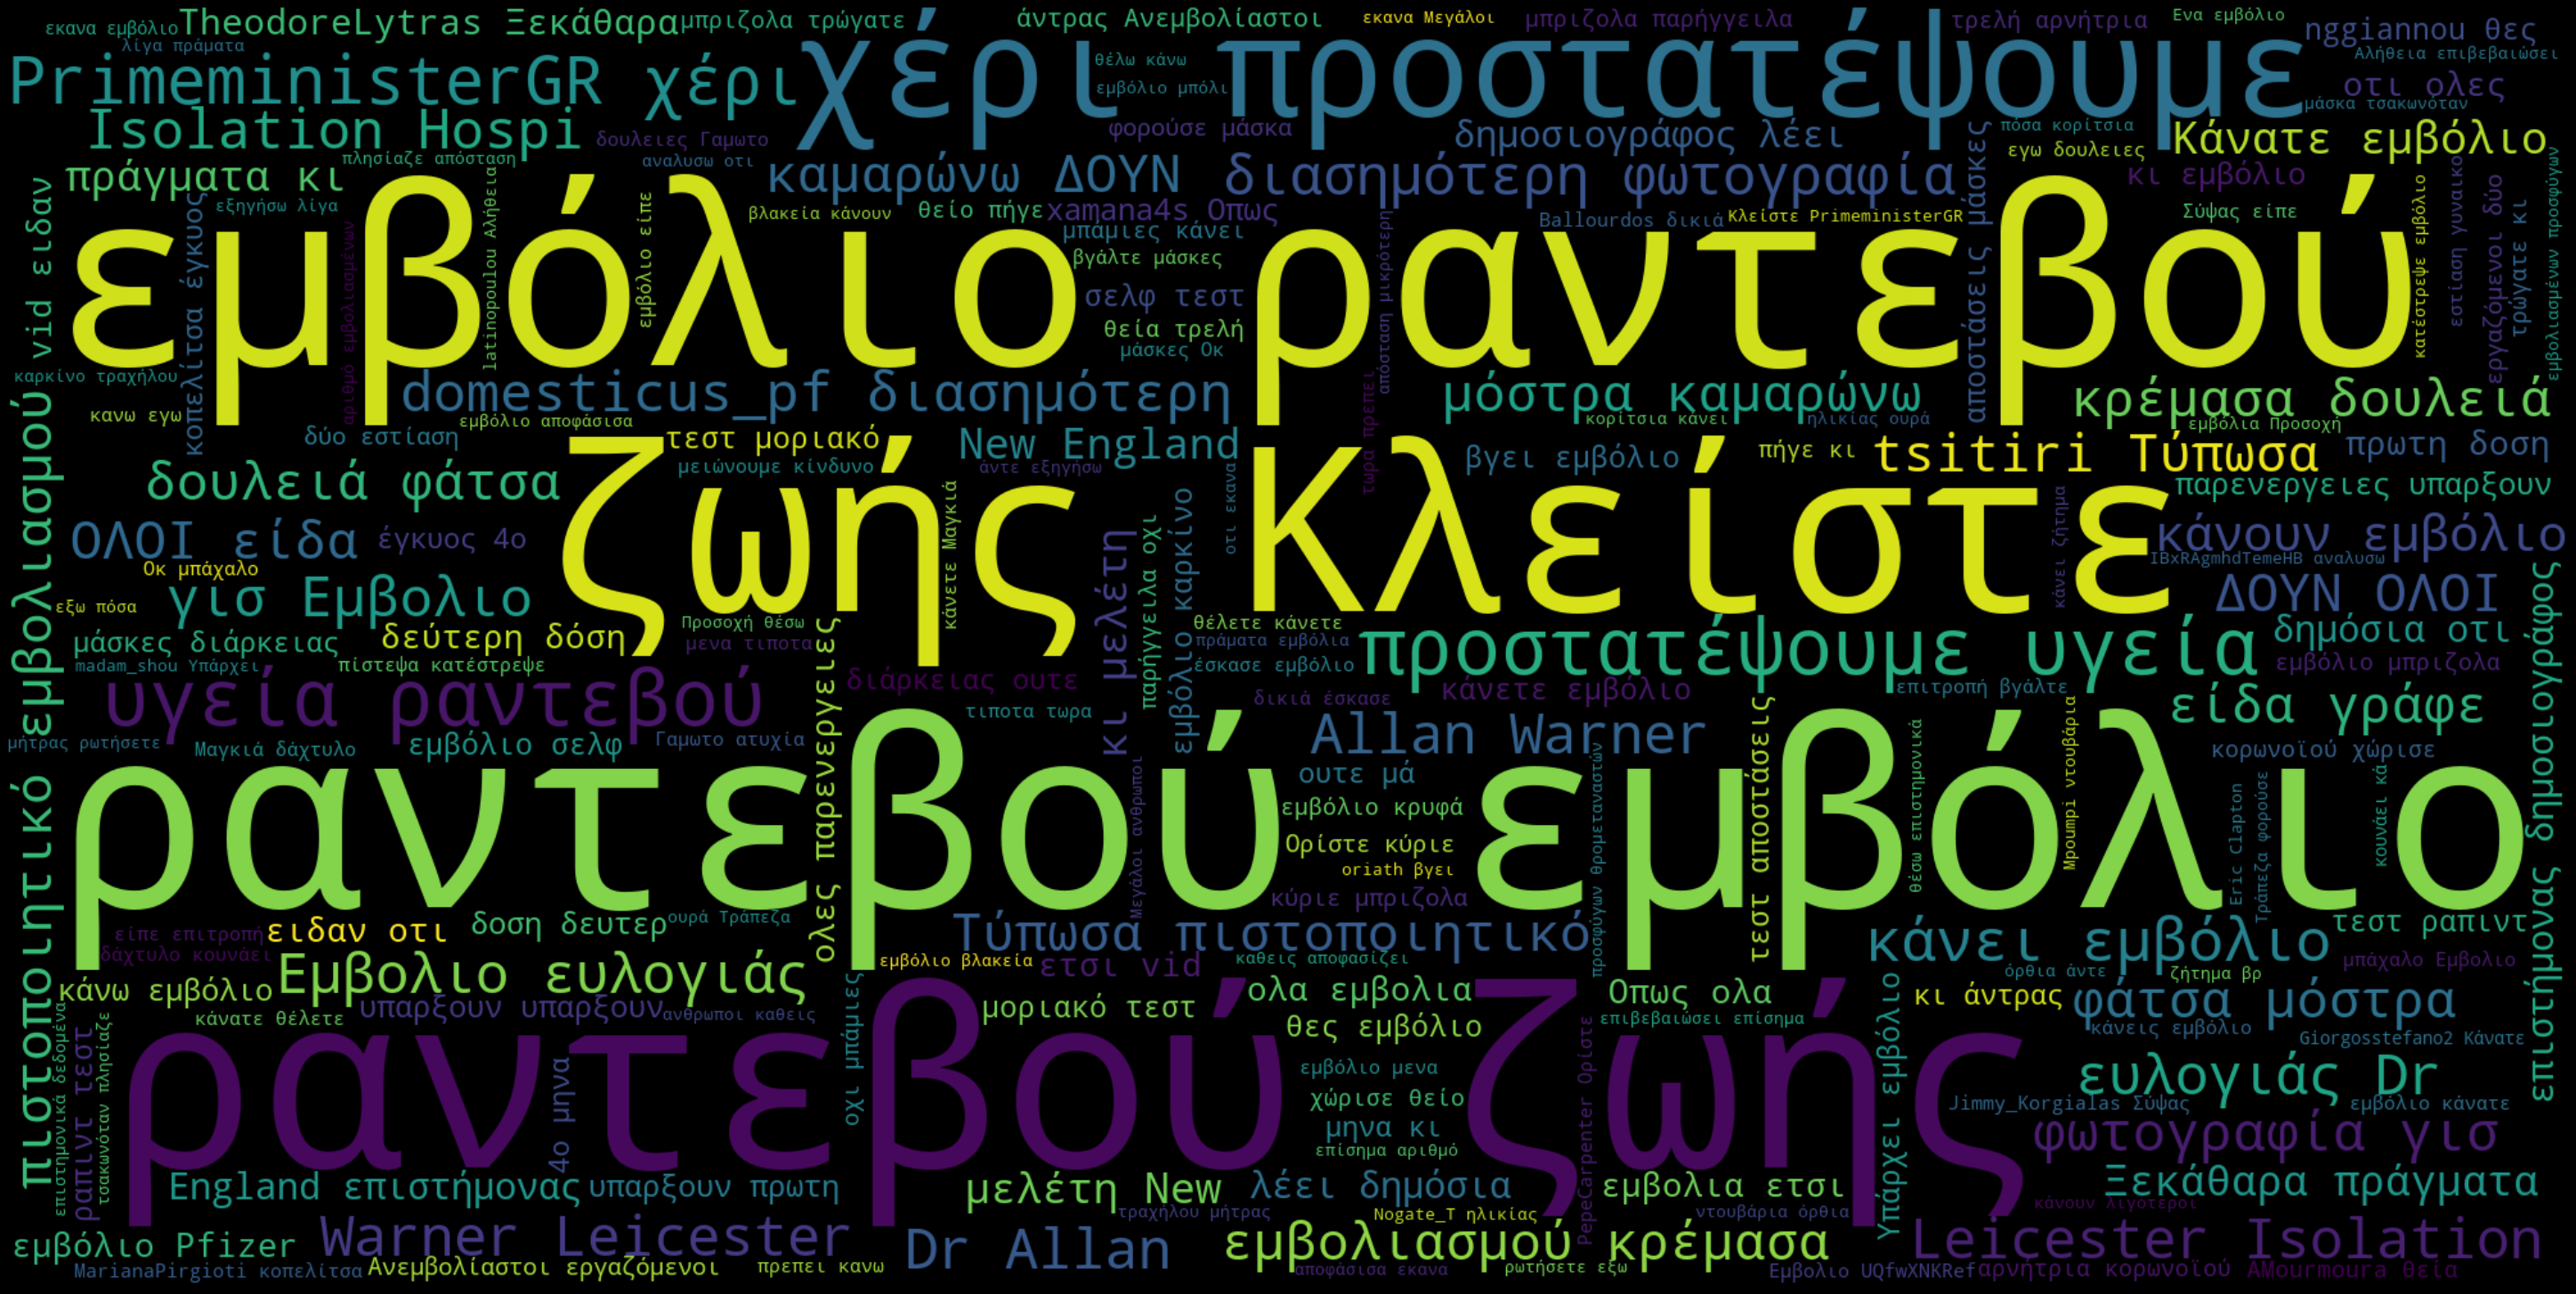

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(textq)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# New scraping attempt (no work done yet)




In [ ]:
#Scraping the articles on economy by Capital.gr
url = 'https://www.cnn.gr/tag/metra-koronoios?page=1'
raw_html = urlopen(url).read()
doc = BeautifulSoup(raw_html, "html.parser")

In [ ]:
doc

In [ ]:
links = doc.select("h3 a") 
links

[]

In [ ]:
urls = [link['href'] for link in capital_links]
urls

['/oikonomia/3557496/to-dnt-proeidopoiei-megales-apokliseis-metaxu-xoron-stin-oikonomiki-anakampsi-apo-to-sok-tou-covid',
 '/oikonomia/3557487/oi-prothesmies-gia-sun-ergasia-gia-aprilio-maio-iounio-kai-gia-anastoles-sumbaseon-gia-martio-aprilio',
 '/oikonomia/3557466/anoigei-aurio-to-ps-ergani-gia-upoboli-monomeron-diloseon-ergazomenon',
 '/oikonomia/3557459/kupros-anodos-kata-58-6-ston-kuklo-ergasion-tis-biomixanias',
 '/oikonomia/3557458/eurostat-meiothike-kata-7-to-meso-eisodima-stin-ee-to-2020',
 '/oikonomia/3557450/pos-tha-dothei-i-epidotisi-theseon-ergasias-to-epomeno-trimino-paradeigmata',
 '/oikonomia/3557455/mixalos-i-ilektroniki-timologisi-boitha-stin-antimetopisi-simantikon-pathogeneion',
 '/oikonomia/3557451/upaat-epipleon-50-ekat-euro-gia-idiotikes-ependuseis-leader-se-oli-ti-xora',
 '/oikonomia/3557449/ep-antagonismou-stis-15-9-tha-exetastei-i-kataggelia-tis-bap-p-kougios-kata-tis-coca-cola-3e',
 '/oikonomia/3557445/prostima-15-600-euro-kai-katasxesi-1-439-proionton-maimo

In [ ]:
capital_titles = [link.text for link in capital_links]
capital_titles

['\rΤο ΔΝΤ προειδοποιεί: "Μεγάλες αποκλίσεις" μεταξύ χωρών στην οικονομική ανάκαμψη από το σοκ του Covid\r',
 'Οι προθεσμίες για Συν-Εργασία για Απρίλιο, Μάιο, Ιούνιο και για αναστολές συμβάσεων για Μάρτιο, Απρίλιο',
 'Ανοίγει αύριο το ΠΣ ΕΡΓΑΝΗ για υποβολή μονομερών δηλώσεων εργαζομένων',
 'Κύπρος: Άνοδος κατά 58,6% στον κύκλο εργασιών της βιομηχανίας',
 'Eurostat: Μειώθηκε κατά 7%\xa0το μέσο εισόδημα\xa0στην ΕΕ το 2020',
 'Πώς θα δοθεί η επιδότηση θέσεων εργασίας το επόμενο τρίμηνο - Παραδείγματα',
 'Μίχαλος: Η ηλεκτρονική τιμολόγηση βοηθά στην αντιμετώπιση σημαντικών παθογενειών',
 'ΥΠΑΑΤ: Επιπλέον 50 εκατ. ευρώ για ιδιωτικές επενδύσεις LEADER σε όλη τη χώρα',
 'Επ. Ανταγωνισμού: Στις 15/9 θα εξεταστεί η καταγγελία της ΒΑΠ Π. Κουγιός κατά της Coca-Cola 3E',
 'Πρόστιμα 15.600 ευρώ και κατάσχεση 1.439 προϊόντων "μαϊμού" σε ελέγχους κατά του παρεμπορίου',
 'Γ. Ζαββός: Εξαιρετικά επιτυχημένη η πορεία του σχεδίου "Ηρακλής"',
 'Ενίσχυση για τους ξεναγούς και τουριστικούς συνοδούς για Μάρτ

In [ ]:
def get_scraped_links(base_list): 
    scraped_links = []
    for url in base_list:
        parent = 'https://' + url.split('/')[2]
        req = requests.get(url, headers)
        print(req)
        soup = BeautifulSoup(req.content, 'html.parser')
        
        for link in soup.select("h2 a"):
            
            
            try:
                l = link.get('href')
                if l[0] == '/': 
                    l = parent + l
                    print(l)
                    scraped_links.append(l)
            
       
            except:
                print('no url')

    print(len(scraped_links))
    
    return scraped_links

In [ ]:
count = 1
pages = []
for i in range(0,20):
    count = count + 1
    page = 'https://www.capital.gr/oikonomia'
    newpage = page + '?page='+ str(count)
    pages.append(newpage)
    print(newpage)

https://www.capital.gr/oikonomia?page=2
https://www.capital.gr/oikonomia?page=3
https://www.capital.gr/oikonomia?page=4
https://www.capital.gr/oikonomia?page=5
https://www.capital.gr/oikonomia?page=6
https://www.capital.gr/oikonomia?page=7
https://www.capital.gr/oikonomia?page=8
https://www.capital.gr/oikonomia?page=9
https://www.capital.gr/oikonomia?page=10
https://www.capital.gr/oikonomia?page=11
https://www.capital.gr/oikonomia?page=12
https://www.capital.gr/oikonomia?page=13
https://www.capital.gr/oikonomia?page=14
https://www.capital.gr/oikonomia?page=15
https://www.capital.gr/oikonomia?page=16
https://www.capital.gr/oikonomia?page=17
https://www.capital.gr/oikonomia?page=18
https://www.capital.gr/oikonomia?page=19
https://www.capital.gr/oikonomia?page=20
https://www.capital.gr/oikonomia?page=21


In [ ]:
urls = get_scraped_links(pages) 

<Response [200]>
https://www.capital.gr/oikonomia/3557388/tte-ametablito-sto-0-06-to-meso-stathmismeno-epitokio-neon-katatheseon-auximeno-sto-3-95-ekeino-ton-neon-daneion
https://www.capital.gr/oikonomia/3557375/tourkia-se-upsilo-duo-eton-o-plithorismos-ton-iounio
https://www.capital.gr/oikonomia/3557362/sentix-beltiothike-gia-pempto-sunexomeno-mina-to-ependutiko-klima-stin-eurozoni
https://www.capital.gr/oikonomia/3557360/eurozoni-se-upsilo-15-eton-o-rmi-upiresion-ton-iounio
https://www.capital.gr/oikonomia/3557358/gsebee-epibeblimeni-i-entaxi-kai-ton-mme-sto-neo-exoikonomo
https://www.capital.gr/oikonomia/3557330/epistrefei-dunamika-to-made-in-france
https://www.capital.gr/oikonomia/3557323/rosia-anodos-tou-rmi-upiresion-ton-iounio-gia-ekto-sunexomeno-mina
https://www.capital.gr/oikonomia/3557314/kina-ti-xamiloteri-anodo-ton-teleutaion-14-minon-kategrapse-o-rmi-upiresion-tis-caixin
https://www.capital.gr/oikonomia/3557302/giati-i-kubernisi-xorkizei-ena-trito-lock-down-tis-oikonomias-

In [ ]:

    #we got an error before, 'NoneType' object is not subscriptable, the function is not finding anything
    # another error = wrong format - https:///oikonomia/3552327/i-g7-enekrine-to-sxedio-gia-ton-pagkosmio-etairiko-foro-15
    # capital_urls = get_scraped_links(pages)

In [ ]:
headers = {'user-agent': 'my-app/0.0.1'}
PAUSE_TIME = 3.5

def get_text(url):
    r = requests.get(url, headers = headers)
    time.sleep(PAUSE_TIME)
    s = BeautifulSoup(r.content, 'html.parser')
    link = s.find("h2 a")
    
    return([s, link])

In [ ]:
scraped_links = []
titles = []
counter = 0
base_url = "https://www.capital.gr/oikonomia?page="
for i in range(1,20):
    url = base_url + str(i)
    #print(url)
    page = requests.get(url, headers = headers)
    s = BeautifulSoup(page.content, 'html.parser')
    #print(s)
    links = s.select("h2 a")
    links = set(links)
    
    url = [link['href'] for link in links]
    
    title = [link.text for link in links]
    
    #print(url)

    for l in url:
        link = l
        l = "https://www.capital.gr" + l  #fixing wrong url formatting
        print(l)
        scraped_links.append(l)

print(url)
print(len(scraped_links)) 
scraped_links = (set(scraped_links))

https://www.capital.gr/oikonomia/3557451/upaat-epipleon-50-ekat-euro-gia-idiotikes-ependuseis-leader-se-oli-ti-xora
https://www.capital.gr/oikonomia/3557445/prostima-15-600-euro-kai-katasxesi-1-439-proionton-maimou-se-elegxous-kata-tou-paremporiou
https://www.capital.gr/oikonomia/3557487/oi-prothesmies-gia-sun-ergasia-gia-aprilio-maio-iounio-kai-gia-anastoles-sumbaseon-gia-martio-aprilio
https://www.capital.gr/oikonomia/3557496/to-dnt-proeidopoiei-megales-apokliseis-metaxu-xoron-stin-oikonomiki-anakampsi-apo-to-sok-tou-covid
https://www.capital.gr/oikonomia/3557424/enisxusi-gia-tous-xenagous-kai-touristikous-sunodous-gia-martio-aprilio-kai-maio
https://www.capital.gr/oikonomia/3557420/germania-perikoptei-tis-ektimiseis-gia-tin-paragogi-autokiniton-to-2021
https://www.capital.gr/oikonomia/3557450/pos-tha-dothei-i-epidotisi-theseon-ergasias-to-epomeno-trimino-paradeigmata
https://www.capital.gr/oikonomia/3557459/kupros-anodos-kata-58-6-ston-kuklo-ergasion-tis-biomixanias
https://www.capi

In [ ]:
len(scraped_links)

330

In [ ]:
#scraping each page
response = requests.get("https://www.capital.gr/oikonomia/3552692/se-proto-xrono-oi-parembaseis-gia-apergies-sundikalistes", headers=headers)
doc = BeautifulSoup(response.text)

In [ ]:
titles = doc.select("h1")[0].text
titles

'Σε πρώτο χρόνο οι παρεμβάσεις για απεργίες - συνδικαλιστές'

In [ ]:
author = doc.select("p")[0].text
author
 
#articleBody > p:nth-child(1) > strong   -- selector, doesn't work

'\nΤου Δημήτρη Κατσαγάνη\n'

In [ ]:
#body = doc.select("#articleBody")[0].text
#body = doc.find_all('div', {'id': 'articleBody'})
#body = doc.find_all('p', {'id': 'articleBody'})
#body = doc.select("p")
body = doc.find_all('p', {'style': 'text-align: justify;'})
###body - doc.find_next_siblings('')
body
# this looks very messy

[<p style="text-align: justify;">
 <strong>Του Δημήτρη Κατσαγάνη</strong>
 </p>, <p style="text-align: justify;">
 	Σε δύο ''δόσεις'' θα εφαρμοστούν κρίσιμες αλλαγές που προβλέπει το εργασιακό νομοσχέδιο του Υπουργού Εργασίας κ. Κωστή Χατζηδάκη, στο συνδικαλιστικό νόμο.
 </p>, <p style="text-align: justify;">
 	Αυτό <a href="https://www.capital.gr/politiki/3550708/katatethike-sti-bouli-to-nomosxedio-gia-tin-prostasia-tis-ergasias-oles-oi-allages" target="_blank">προβλέπει το ίδιο το νομοσχέδιο</a> (άρθρο 100), θέτοντας ως ''ορόσημα'' δύο ημερομηνίες. Η πρώτη ημερομηνία είναι η δημοσίευση του επερχόμενου νέου νόμου (σ.σ. μετά τις 17 Ιουνίου), ενώ η δεύτερη κρίσιμη ημερομηνία είναι η 1η Ιανουαρίου του 2022. 
 </p>, <p style="text-align: justify;">
 	Έτσι ορισμένες αλλαγές (πχ εγγραφή στο Μητρώο Συνδικαλιστικών Οργανώσεων των συνδικάτων που συστάθηκαν μετά την 1η Ιουλίου του 1982) θα ισχύσουν αμέσως μετά την αναμενόμενη ψήφιση του νομοσχεδίου Χατζηδάκη (σ.σ. 17 Ιουνίου), ενώ κάποιες άλλες

In [ ]:
date = doc.select("h5")[0].text
date

'Δευτέρα, 14-Ιουν-2021 16:13'

In [ ]:
list=[]
for i in urls[0:30]:  #test ###change this
    dic = {}
    #url = base_url + str(i)
    print(i)
    page = requests.get(i, headers = headers)
    soup = BeautifulSoup(page.content, 'html.parser')

    
    title = soup.select("h1")

    if (title):
        dic['title'] = soup.select("h1")[0].text
    else:
        print("ARTICLE NO: ", link, " HAS NO TITLE")
        dic['title'] = "NO TITLE"
    
    author = soup.select('p')
    if (author):
        dic['author'] = soup.select("p")[0].text
    else:
        print("ARTICLE NO: ", link, " HAS NO author")
        dic['author'] = "NO author"


    date = soup.select('h5')
    if (date):
        dic['date'] = soup.select('h5')[0].text
    else:
        print("ARTICLE NO: ", link, " HAS NO date")
        dic['date'] = "NO date"
      

    article =  soup.find_all('p', {'style': 'text-align: justify;'})
    if (article):
        dic['body'] = soup.find_all('p', {'style': 'text-align: justify;'})
    else:
        print("ARTICLE NO: ", link, " HAS NO body")
        dic['body'] = "NO body"  

    
    dic['url'] = i
    
    list.append(dic)

    time.sleep(0.5)

https://www.capital.gr/oikonomia/3557388/tte-ametablito-sto-0-06-to-meso-stathmismeno-epitokio-neon-katatheseon-auximeno-sto-3-95-ekeino-ton-neon-daneion
https://www.capital.gr/oikonomia/3557375/tourkia-se-upsilo-duo-eton-o-plithorismos-ton-iounio
https://www.capital.gr/oikonomia/3557362/sentix-beltiothike-gia-pempto-sunexomeno-mina-to-ependutiko-klima-stin-eurozoni
https://www.capital.gr/oikonomia/3557360/eurozoni-se-upsilo-15-eton-o-rmi-upiresion-ton-iounio
https://www.capital.gr/oikonomia/3557358/gsebee-epibeblimeni-i-entaxi-kai-ton-mme-sto-neo-exoikonomo
https://www.capital.gr/oikonomia/3557330/epistrefei-dunamika-to-made-in-france
https://www.capital.gr/oikonomia/3557323/rosia-anodos-tou-rmi-upiresion-ton-iounio-gia-ekto-sunexomeno-mina
https://www.capital.gr/oikonomia/3557314/kina-ti-xamiloteri-anodo-ton-teleutaion-14-minon-kategrapse-o-rmi-upiresion-tis-caixin
https://www.capital.gr/oikonomia/3557302/giati-i-kubernisi-xorkizei-ena-trito-lock-down-tis-oikonomias-i-alitheia-ton-ar

In [ ]:
df = pd.DataFrame(list)
df

In [ ]:
df.dtypes

In [ ]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [ ]:
df['author'] = df['author'].str.replace(r'[\n\r\t]',' ', regex=True)  

In [ ]:
df['body'] = df['body'].str.replace(r'[\n\r\t]',' ', regex=True)  


In [ ]:
df['body']

In [ ]:
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/capital_articles.tsv", sep='\t')
capital_articles_df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/capital_articles.tsv", sep='\t')  ### SAVED

In [ ]:
capital_articles_df

In [ ]:
 ######################## DROP ###############################################################  #######################################################



# problem with article text #



  ####################################################### ####################################################### #######################################################

In [ ]:

################## Code SOURCE LINK - https://github.com/datajour-gr/Data_journalism/blob/master/scraping/read_%26_save_tweets_search_colab.ipynb   ########


In [ ]:
from datetime import timedelta
from datetime import datetime as dt

In [ ]:
!pip install Twython
from twython import Twython

CONSUMER_KEY = "moGbJUrmr1d3IcDhaaJxQ72lc"
CONSUMER_SECRET = "m12HK0zHc2HgIePNjeMzZn8z80oyJEMcypsVrHSIJA3eBKa0Pw"
OAUTH_TOKEN = "1166254978480128002-RVb5mYtTjBWP3doZW6kVhKAn0B5Ue8"
OAUTH_TOKEN_SECRET = "wwsyxMoVJC6Pm3SLW9KhhxST3Gs95FmC30oh7BLjvvXRo"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [ ]:
tweets = []
MAX_ATTEMPTS = 40
COUNT_OF_TWEETS_TO_BE_FETCHED = 3800 

for i in range(0,MAX_ATTEMPTS):

    if(COUNT_OF_TWEETS_TO_BE_FETCHED < len(tweets)):
        print("We Got ", len(tweets), " tweets.")
        break # we got the  tweets... !!

    #----------------------------------------------------------------#
    # STEP 1: Query Twitter
    # STEP 2: Save the returned tweets
    # STEP 3: Get the next max_id
    #----------------------------------------------------------------#

    # STEP 1: Query Twitter
    if(0 == i):
        # Query twitter for data. 
        results = twitter.search(q="150_ευρω",count='100')
        print("I Got:", len(results['statuses']), " tweets")
    else:
        # After the first call we should have max_id from result of previous call. Pass it in query.
        results = twitter.search(q="150_ευρω",count='100', include_entities='true',max_id=next_max_id)
        print("I Got:", len(results['statuses']), " tweets")


    # STEP 2: Save the returned tweets
    for result in results['statuses']:
#        tweet_text = result['text']
        tweets.append(result)


    # STEP 3: Get the next max_id
    try:
        # Parse the data returned to get max_id to be passed in consequent call.
        next_results_url_params = results['search_metadata']['next_results']
        next_max_id = next_results_url_params.split('max_id=')[1].split('&')[0]
    except:
        break

In [ ]:
tweets = pd.DataFrame(tweets)
tweets

In [ ]:
tweets.head()

In [ ]:
df = tweets[['created_at','text', 'lang', 'retweet_count']]

In [ ]:
tweets_df_q 

In [ ]:
tweets_df_q['text'][2]

'RT @Foteini78580217: "Εξαερώθηκε" η ανοσία στο #Ισραήλ - "Κούφιο" το εμβόλιο #Pfizer/#Biontech \n\nhttps://t.co/pxV2AbYT3L μέσω @YouTube \n \n#…'

In [ ]:
tweets_df_q[tweets_df_q['lang'] == "el"].value_counts()
#αναμενόμενο τα περισσότερα ειναι στα ελληνικα

created_at                      text                                                                                                                                               lang  retweet_count
Wed Jun 30 20:48:36 +0000 2021  RT @VasoKouk: Ρισκάρεις την ζωή σου για 150 Ευρώ ; https://t.co/kbSsjmJzA6                                                                         el    13               2
Thu Jul 01 23:24:12 +0000 2021  RT @Thanos32457198: Ρε @P_Kiamos Κιάμο,σού´χουν πει ότι οι 90χρονοι ΔΕΝ ακούνε Κιάμο‼️\nΕλπίζουμε ΝΑ ΤΟ ΚΛΕΙΣΕΙΣ ΣΥΝΤΟΜΑ το χαμαιτυπείο σου…       el    3                2
Wed Jun 30 23:58:01 +0000 2021  RT @demina: Πανηλίθιοι #διπλής #150_ευρω #προνόμια #κυβερνηση_καρναβαλι #Κυβέρνηση_Μητσοτάκη https://t.co/FQZNqhR54F                               el    5                1
Sat Jul 03 16:42:11 +0000 2021  @tovimagr Πρέπει να βγούνε και τα 150 ευρώ που έταξε ο πολιτικός κρατούμενος στους νέους ώστε να εμβολιαστούν.                                     el    0   

In [ ]:
tweets_df_q[tweets_df_q['lang'] == "en"].value_counts()
# αυτα στα αγγλικά φαίνονται άσχετα

created_at                      text                                                                                                                                          lang  retweet_count
Wed Jun 30 21:21:55 +0000 2021  RT @beacon_freedom: Blast from the past! #150_ευρω                                                                                            en    1                1
Wed Jun 30 19:23:30 +0000 2021  Blast from the past! #150_ευρω https://t.co/HQ19MIspnL                                                                                        en    1                1
Wed Jun 30 12:57:51 +0000 2021  RT @nakomiGIANNIS: 3...2...1...action   #προνομια #150_ευρω #εμβολια #μασκες https://t.co/DIHioq1Chv                                          en    6                1
Wed Jun 30 11:00:26 +0000 2021  RT @sw4ggyb1tch: this didn't age well... #150_ευρω #κυβερνηση_καρναβαλι #τι_ψηφισατε_ρε_μαλακες                                               en    2                1
Wed Jun 30

In [ ]:
#tweets_df_q['lang'] = tweets_df_q[tweets_df_q['lang'] == "el"]
#tweets_df_q.drop(index, inplace=True)
#subset = tweets_df_q[tweets_df_q['lang'] == 'en']              /// check later to remove EN, there is a problem with format

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
tweets_df_q.to_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_2.tsv", sep='\t')   ## this time I;m making a back-up version

In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_2.tsv", sep='\t')

In [ ]:
df

In [ ]:
#df.dropna()

In [ ]:
df['created_at']

0       Wed Jun 30 21:20:56 +0000 2021
1       Wed Jun 30 21:20:05 +0000 2021
2       Wed Jun 30 21:19:30 +0000 2021
3       Wed Jun 30 21:18:56 +0000 2021
4       Wed Jun 30 21:17:49 +0000 2021
                     ...              
3895    Tue Jun 29 17:21:47 +0000 2021
3896    Tue Jun 29 17:21:46 +0000 2021
3897    Tue Jun 29 17:21:45 +0000 2021
3898    Tue Jun 29 17:21:30 +0000 2021
3899    Tue Jun 29 17:21:29 +0000 2021
Name: created_at, Length: 3900, dtype: object

In [ ]:
#df = df.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

In [ ]:
pd.to_datetime(df['created_at'])  ## wow. scrap the rest.

0      2021-06-30 21:20:56+00:00
1      2021-06-30 21:20:05+00:00
2      2021-06-30 21:19:30+00:00
3      2021-06-30 21:18:56+00:00
4      2021-06-30 21:17:49+00:00
                  ...           
3895   2021-06-29 17:21:47+00:00
3896   2021-06-29 17:21:46+00:00
3897   2021-06-29 17:21:45+00:00
3898   2021-06-29 17:21:30+00:00
3899   2021-06-29 17:21:29+00:00
Name: created_at, Length: 3900, dtype: datetime64[ns, UTC]

In [ ]:
#df.to_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_3.tsv", sep='\t')   ## 3rd version with datetime

In [ ]:
#df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_3.tsv", sep='\t')

In [ ]:
df.dropna()
df.tail()

created_at  ... retweet_count
3895  Wed Jun 30 10:37:39 +0000 2021  ...             1
3896  Wed Jun 30 10:36:37 +0000 2021  ...             0
3897  Wed Jun 30 10:35:43 +0000 2021  ...            28
3898  Wed Jun 30 10:35:32 +0000 2021  ...           126
3899  Wed Jun 30 10:35:04 +0000 2021  ...           200

[5 rows x 4 columns]

In [ ]:
df.get('created_at')

0       Mon Jul 05 17:50:55 +0000 2021
1       Mon Jul 05 17:50:14 +0000 2021
2       Mon Jul 05 17:48:10 +0000 2021
3       Mon Jul 05 17:44:47 +0000 2021
4       Mon Jul 05 17:44:27 +0000 2021
                     ...              
3895    Wed Jun 30 10:37:39 +0000 2021
3896    Wed Jun 30 10:36:37 +0000 2021
3897    Wed Jun 30 10:35:43 +0000 2021
3898    Wed Jun 30 10:35:32 +0000 2021
3899    Wed Jun 30 10:35:04 +0000 2021
Name: created_at, Length: 3900, dtype: object

In [ ]:
# indexing based on Time
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_2.tsv", sep='\t', index_col ="created_at")
df

In [ ]:
pd.to_datetime(df['created_at'])

In [ ]:
df['created_at'].dt.time(format='%a %b %d %H:%M:%S +0000 %Y')

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'],format='%a %b %d %H:%M:%S +0000 %Y')  # Length of values (1) does not match length of index (3900)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['created_at']

0      2021-07-05 17:50:55
1      2021-07-05 17:50:14
2      2021-07-05 17:48:10
3      2021-07-05 17:44:47
4      2021-07-05 17:44:27
               ...        
3895   2021-06-30 10:37:39
3896   2021-06-30 10:36:37
3897   2021-06-30 10:35:43
3898   2021-06-30 10:35:32
3899   2021-06-30 10:35:04
Name: created_at, Length: 3900, dtype: datetime64[ns]

In [ ]:
df['created_at'].dropna()

0      2021-07-05 17:50:55
1      2021-07-05 17:50:14
2      2021-07-05 17:48:10
3      2021-07-05 17:44:47
4      2021-07-05 17:44:27
               ...        
3895   2021-06-30 10:37:39
3896   2021-06-30 10:36:37
3897   2021-06-30 10:35:43
3898   2021-06-30 10:35:32
3899   2021-06-30 10:35:04
Name: created_at, Length: 3900, dtype: datetime64[ns]

In [ ]:
df['created_at']

0      2021-07-05 17:50:55
1      2021-07-05 17:50:14
2      2021-07-05 17:48:10
3      2021-07-05 17:44:47
4      2021-07-05 17:44:27
               ...        
3895   2021-06-30 10:37:39
3896   2021-06-30 10:36:37
3897   2021-06-30 10:35:43
3898   2021-06-30 10:35:32
3899   2021-06-30 10:35:04
Name: created_at, Length: 3900, dtype: datetime64[ns]

In [ ]:
df['created_at'] = pd.Series()

In [ ]:
len(df['created_at'])

In [ ]:
len(df['text'])

In [ ]:
##################################### INDEXING PROBLEM, CANNOT CONVERT TO DATETIME #############################


In [ ]:
df.dtypes

Unnamed: 0        int64
Unnamed: 0.1      int64
created_at       object
text             object
lang             object
retweet_count     int64
dtype: object

In [ ]:
tosplit = df['created_at'].str.split(" ", expand = True)

In [ ]:
tosplit 

In [ ]:
df['date'] = tosplit[0]
df['time'] = tosplit[1]

In [ ]:
df

In [ ]:
####### το πρόβλημα είανι οτι όλα ειναι από την ίδια μερα και δεν εχει νοημα να χρησιμοποιησω το date.  μόνο το time. πρεπει να ειναι σε datetime.....   df['time'] = pd.to_datetime(df['time'])

In [ ]:
##################

################                 BETTER MOVE ON TO TEXT ANALYSIS WITHOUT CARING ABOUT TIME                    #############

### index dates for it to work somehow? ####

# Scraping - scroll (no work done yet)

In [ ]:
#εισαγωγή libraries που θα χρειαστώ
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import ast
import time
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [ ]:

stories_list = []

stories = soup.find_all('div', { 'class': 'article' })

for story in stories:
    heading = story.find('h1')  #h3
    link = heading.find('a')
    date = story.find('time')
    datetime = date['datetime']

    
    story_dict = {
        'headline': heading.text,
        'url': link['href'],
        'date': datetime
    }
     
    # Πρόσθεσε το λέξικο στη λίστα
    stories_list.append(story_dict)

In [ ]:
print(len(stories_list))

0


In [ ]:
response = requests.get('https://www.kathimerini.gr/economy/business/')
document = BeautifulSoup(response.text, 'html.parser')

In [ ]:
links = document.select("h2 a") 

In [ ]:
links

[<a href="https://www.kathimerini.gr/economy/business/561425071/elliniko-paroysiastike-o-protos-prasinos-oyranoxystis-sti-chora/">Ελληνικό: Παρουσιάστηκε ο πρώτος «πράσινος» ουρανοξύστης στη χώρα</a>,
 <a href="https://www.kathimerini.gr/economy/business/561425044/o-efoplistis-g-prokopioy-o-pleiodotis-stoys-dyo-diagonismoys-gia-ta-naypigeia-skaramagka/">Στον εφοπλιστή Γ. Προκοπίου τα Ναυπηγεία Σκαραμαγκά</a>,
 <a href="https://www.kathimerini.gr/economy/561424882/symfonia-nova-me-intracom-telecom-gia-asyrmata-diktya/">Συμφωνία Nova με Intracom Telecom για ασύρματα δίκτυα</a>,
 <a href="https://www.kathimerini.gr/economy/561424876/o-stochos-tis-dei-gia-na-anakampsei-oristika/">Ο στόχος της ΔΕΗ για να ανακάμψει οριστικά</a>,
 <a href="https://www.kathimerini.gr/economy/561424813/elliniko-i-paroysiasi-toy-oyranoxysti-marina-tower-apo-ti-lamda-development/">Ελληνικό: Η παρουσίαση του ουρανοξύστη Marina Tower από τη Lamda Development</a>,
 <a href="https://www.kathimerini.gr/economy/5614235

In [ ]:
#picking out the href element
urls = [link['href'] for link in links]
urls

['https://www.kathimerini.gr/economy/business/561425071/elliniko-paroysiastike-o-protos-prasinos-oyranoxystis-sti-chora/',
 'https://www.kathimerini.gr/economy/business/561425044/o-efoplistis-g-prokopioy-o-pleiodotis-stoys-dyo-diagonismoys-gia-ta-naypigeia-skaramagka/',
 'https://www.kathimerini.gr/economy/561424882/symfonia-nova-me-intracom-telecom-gia-asyrmata-diktya/',
 'https://www.kathimerini.gr/economy/561424876/o-stochos-tis-dei-gia-na-anakampsei-oristika/',
 'https://www.kathimerini.gr/economy/561424813/elliniko-i-paroysiasi-toy-oyranoxysti-marina-tower-apo-ti-lamda-development/',
 'https://www.kathimerini.gr/economy/561423580/toyrismos-argi-i-anakampsi-sta-ellinika-aerodromia/',
 'https://www.kathimerini.gr/economy/561423505/anastoles-mono-se-kladoys-poy-synechizoyn-na-plittontai/',
 'https://www.kathimerini.gr/economy/561421624/nees-ependyseis-se-ypodomes-kai-e-fresh-ektos-attikis/',
 'https://www.kathimerini.gr/economy/561423907/eee-anamenei-ti-desmi-metron-tis-e-e-gia-to-kl

In [ ]:
#picking out the text element
titles = [link.text for link in links]
titles

['Ελληνικό: Παρουσιάστηκε ο πρώτος «πράσινος» ουρανοξύστης στη χώρα',
 'Στον εφοπλιστή Γ. Προκοπίου τα Ναυπηγεία Σκαραμαγκά',
 'Συμφωνία Nova με Intracom Telecom για ασύρματα δίκτυα',
 'Ο στόχος της ΔΕΗ για να ανακάμψει οριστικά',
 'Ελληνικό: Η παρουσίαση του ουρανοξύστη Marina Tower από τη Lamda Development',
 'Τουρισμός: Αργή η ανάκαμψη στα ελληνικά αεροδρόμια',
 'Αναστολές μόνο σε κλάδους που συνεχίζουν να πλήττονται',
 'Νέες επενδύσεις σε υποδομές και e-fresh εκτός Αττικής',
 'ΕΕΕ: Αναμένει τη δέσμη μέτρων της Ε.Ε. για το κλίμα',
 'Διαδικτυακή επίσκεψη στον ουρανοξύστη του Ελληνικού',
 'Eύσημα Moody’s στην Alpha Bank για αύξηση κεφαλαίου',
 'Πειραιώς: ολοκληρώθηκαν οι τιτλοποιήσεις Phoenix και Vega ύψους 7 δισ. \u200b\u200b\u200b\u200b\u200b\u200b\u200b',
 'Εξαγορές σε Γερμανία, Δανία και ΗΠΑ από την ελληνική Advent Technologies',
 'Προς επιβολή προστίμου στην Coca-Cola 3E από την Επιτροπή Ανταγωνισμού',
 'Ξενοδοχεία: Άνοιξε η συντριπτική πλειονότητα στο νότιο Αιγαίο',
 'Κύκλος εργ

In [ ]:
#making a list with urls to scrape

def get_scraped_links(base_list): 
    scraped_links = []
    
    for url in base_list:
        parent = 'https://' + url.split('/')[2]
        req = requests.get(url)
        print(req)
        soup = BeautifulSoup(req.content, 'html.parser')
        
        for link in soup.select("h2 a"):
            try:
                l = link.get('href')
                if l[0] == '/': 
                    l = parent + l
                    print(l)
                    scraped_links.append(l)
            except:
                print('no url')
    
    print(len(scraped_links))
    return scraped_links

In [ ]:
num = 1
pages = []
for i in range(0,50):
    num = num + 1
    page = 'https://www.kathimerini.gr/economy/business/'
    newpage = page + '?fwp_paged='+ str(num)
    pages.append(newpage)
    print(newpage)

    # όμως δεν έχουμε αριθμημένα pages.  έχουμε ::after
    #content-wrap > main > div:nth-child(2) > div:nth-child(1) > div > div:nth-child(20) > div > a

https://www.kathimerini.gr/economy/business/?fwp_paged=2
https://www.kathimerini.gr/economy/business/?fwp_paged=3
https://www.kathimerini.gr/economy/business/?fwp_paged=4
https://www.kathimerini.gr/economy/business/?fwp_paged=5
https://www.kathimerini.gr/economy/business/?fwp_paged=6
https://www.kathimerini.gr/economy/business/?fwp_paged=7
https://www.kathimerini.gr/economy/business/?fwp_paged=8
https://www.kathimerini.gr/economy/business/?fwp_paged=9
https://www.kathimerini.gr/economy/business/?fwp_paged=10
https://www.kathimerini.gr/economy/business/?fwp_paged=11
https://www.kathimerini.gr/economy/business/?fwp_paged=12
https://www.kathimerini.gr/economy/business/?fwp_paged=13
https://www.kathimerini.gr/economy/business/?fwp_paged=14
https://www.kathimerini.gr/economy/business/?fwp_paged=15
https://www.kathimerini.gr/economy/business/?fwp_paged=16
https://www.kathimerini.gr/economy/business/?fwp_paged=17
https://www.kathimerini.gr/economy/business/?fwp_paged=18
https://www.kathimerin

In [ ]:
urls = get_scraped_links(pages)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
0


In [ ]:
headers = {'user-agent': 'my-app/0.0.1'}
PAUSE_TIME = 3.5

def get_text(url):
    r = requests.get(url, headers = headers)
    time.sleep(PAUSE_TIME)
    s = BeautifulSoup(r.content, 'html.parser')
    link = s.find("h2 a")
    
    return([s, link])

In [ ]:
scraped_links = []
titles = []
counter = 0
base_url = "https://www.kathimerini.gr/economy/business/?fwp_paged="
for i in range(0,15):
    url = base_url + str(i)
    #print(url)
    page = requests.get(url, headers = headers)
    s = BeautifulSoup(page.content, 'html.parser')
    #print(s)
    links = s.select("h2 a")
    links = set(links)
    
    url = [link['href'] for link in links]
    
    print(url)

    for l in url:
        link = l
        print(l)
        scraped_links.append(l)

print(len(scraped_links)) 



['https://www.kathimerini.gr/economy/561421624/nees-ependyseis-se-ypodomes-kai-e-fresh-ektos-attikis/', 'https://www.kathimerini.gr/economy/561419953/dimosia-protasi-apo-belterra-gia-to-100-ton-metochon-toy-olth/', 'https://www.kathimerini.gr/economy/561423505/anastoles-mono-se-kladoys-poy-synechizoyn-na-plittontai/', 'https://www.kathimerini.gr/economy/561423580/toyrismos-argi-i-anakampsi-sta-ellinika-aerodromia/', 'https://www.kathimerini.gr/economy/561419962/megali-ayxisi-christon-gia-to-box-tis-cosmote/', 'https://www.kathimerini.gr/economy/561420013/telos-epochis-gia-mpompola-apo-tin-ellaktor/', 'https://www.kathimerini.gr/economy/561423247/xenodocheia-anoixe-i-syntriptiki-pleionotita-sto-notio-aigaio/', 'https://www.kathimerini.gr/economy/business/561425044/o-efoplistis-g-prokopioy-o-pleiodotis-stoys-dyo-diagonismoys-gia-ta-naypigeia-skaramagka/', 'https://www.kathimerini.gr/economy/561424813/elliniko-i-paroysiasi-toy-oyranoxysti-marina-tower-apo-ti-lamda-development/', 'https://

In [ ]:
scraped_links 
#apparently παίρνει όσα άρθρα θέλει μέχρι να πετάξει Connection reset by peer..

['https://www.kathimerini.gr/economy/561421624/nees-ependyseis-se-ypodomes-kai-e-fresh-ektos-attikis/',
 'https://www.kathimerini.gr/economy/561419953/dimosia-protasi-apo-belterra-gia-to-100-ton-metochon-toy-olth/',
 'https://www.kathimerini.gr/economy/561423505/anastoles-mono-se-kladoys-poy-synechizoyn-na-plittontai/',
 'https://www.kathimerini.gr/economy/561423580/toyrismos-argi-i-anakampsi-sta-ellinika-aerodromia/',
 'https://www.kathimerini.gr/economy/561419962/megali-ayxisi-christon-gia-to-box-tis-cosmote/',
 'https://www.kathimerini.gr/economy/561420013/telos-epochis-gia-mpompola-apo-tin-ellaktor/',
 'https://www.kathimerini.gr/economy/561423247/xenodocheia-anoixe-i-syntriptiki-pleionotita-sto-notio-aigaio/',
 'https://www.kathimerini.gr/economy/business/561425044/o-efoplistis-g-prokopioy-o-pleiodotis-stoys-dyo-diagonismoys-gia-ta-naypigeia-skaramagka/',
 'https://www.kathimerini.gr/economy/561424813/elliniko-i-paroysiasi-toy-oyranoxysti-marina-tower-apo-ti-lamda-development/',
 

In [ ]:
print(len(scraped_links)) 

330


In [ ]:
df = pd.DataFrame(scraped_links, columns= ['url'])

In [ ]:
df.to_csv("kathimerini.csv", index=False)

In [ ]:
df = pd.read_csv('kathimerini.csv')

In [ ]:
df

url
0    https://www.kathimerini.gr/economy/561421624/n...
1    https://www.kathimerini.gr/economy/561419953/d...
2    https://www.kathimerini.gr/economy/561423505/a...
3    https://www.kathimerini.gr/economy/561423580/t...
4    https://www.kathimerini.gr/economy/561419962/m...
..                                                 ...
325  https://www.kathimerini.gr/economy/561424876/o...
326  https://www.kathimerini.gr/economy/561423907/e...
327  https://www.kathimerini.gr/economy/561419968/a...
328  https://www.kathimerini.gr/economy/561423490/p...
329  https://www.kathimerini.gr/economy/business/56...

[330 rows x 1 columns]

In [ ]:
urls = df['url'].tolist()
urls

['https://www.kathimerini.gr/economy/561421624/nees-ependyseis-se-ypodomes-kai-e-fresh-ektos-attikis/',
 'https://www.kathimerini.gr/economy/561419953/dimosia-protasi-apo-belterra-gia-to-100-ton-metochon-toy-olth/',
 'https://www.kathimerini.gr/economy/561423505/anastoles-mono-se-kladoys-poy-synechizoyn-na-plittontai/',
 'https://www.kathimerini.gr/economy/561423580/toyrismos-argi-i-anakampsi-sta-ellinika-aerodromia/',
 'https://www.kathimerini.gr/economy/561419962/megali-ayxisi-christon-gia-to-box-tis-cosmote/',
 'https://www.kathimerini.gr/economy/561420013/telos-epochis-gia-mpompola-apo-tin-ellaktor/',
 'https://www.kathimerini.gr/economy/561423247/xenodocheia-anoixe-i-syntriptiki-pleionotita-sto-notio-aigaio/',
 'https://www.kathimerini.gr/economy/business/561425044/o-efoplistis-g-prokopioy-o-pleiodotis-stoys-dyo-diagonismoys-gia-ta-naypigeia-skaramagka/',
 'https://www.kathimerini.gr/economy/561424813/elliniko-i-paroysiasi-toy-oyranoxysti-marina-tower-apo-ti-lamda-development/',
 

In [ ]:
response = requests.get("https://www.kathimerini.gr/economy/561372487/ochi-apo-ste-stin-aktor-gia-tin-egnatia/", headers=headers)

doc = BeautifulSoup(response.text)

In [ ]:
# Τίτλος
titles = doc.select("h1")[0].text
titles

'«Όχι» από ΣτΕ στην «Ακτωρ» για την Εγνατία'

In [ ]:
#Συγγραφέας
author = doc.select("div.entry-meta > div > div > div > a > span")[0].text.strip()
author

'Νίκος Ρουσάνογλου'

In [ ]:
#Ημερομηνία
date = doc.select("div.entry-meta > div > span > time.meta-date-modified.updated")[0].text.strip()
date

'22.05.2021 • 10:04'

In [ ]:
#Κείμενο
article = doc.select("div.entry-content")[0].text
article
##post-561372487 > div.entry-content

"\nΟριστικά εκτός της συνέχειας του διαγωνισμού για την ανάληψη της σύμβασης παραχώρησης εκμετάλλευσης της Εγνατίας Οδού έμεινε χθες η «Ακτωρ Παραχωρήσεις» του ομίλου Ελλάκτωρ, καθώς απορρίφθηκαν τα ασφαλιστικά μέτρα που είχε καταθέσει στο ΣτΕ προκειμένου να της επιτραπεί η υποβολή προσφοράς. Υπενθυμίζεται ότι η «Ακτωρ Παραχωρήσεις» ενημερώθηκε από τον μέχρι πρότινος εταίρο της, την εταιρεία Roadis, ότι δεν πρόκειται να συμμετάσχει στον διαγωνισμό σε ημερομηνία τέτοια που δεν επιτρέπονταν πλέον αλλαγές στα σχήματα που θα κατέθεταν προσφορές.\n\n\nif (isNXMobile) {\ngoogletag.cmd.push(function() { googletag.display('nx_ad_Category_SB_1_mb'); });\n}\n\n\n\nΗ διοίκηση του ΤΑΙΠΕΔ αρνήθηκε να επιτρέψει αλλαγή μετά το πέρας της σχετικής προθεσμίας και η «Ακτωρ Παραχωρήσεις» προσέφυγε στο ΣτΕ, χωρίς επιτυχία. Ως εκ τούτου, πλέον ο διαγωνισμός θα ολοκληρωθεί με τη συμμετοχή των άλλων δύο σχημάτων που έχουν υποβάλει δεσμευτικές οικονομικές προσφορές ήδη από τις αρχές Απριλίου. Ο λόγος για την κ

In [ ]:
#article = doc.select("div.entry-content > p:nth-child(1)")[0].text
article = doc.select("div.entry-content > p:nth-of-type(1)")[0].text
#article = doc.select("div.entry-content > p:nth-of-type(1)" + "div.entry-content > p:nth-of-type(2)").text
article
#post-561372487 > div.entry-content > p:nth-child(4)
#soup.select("#names + p + p")


'Οριστικά εκτός της συνέχειας του διαγωνισμού για την ανάληψη της σύμβασης παραχώρησης εκμετάλλευσης της Εγνατίας Οδού έμεινε χθες η «Ακτωρ Παραχωρήσεις» του ομίλου Ελλάκτωρ, καθώς απορρίφθηκαν τα ασφαλιστικά μέτρα που είχε καταθέσει στο ΣτΕ προκειμένου να της επιτραπεί η υποβολή προσφοράς. Υπενθυμίζεται ότι η «Ακτωρ Παραχωρήσεις» ενημερώθηκε από τον μέχρι πρότινος εταίρο της, την εταιρεία Roadis, ότι δεν πρόκειται να συμμετάσχει στον διαγωνισμό σε ημερομηνία τέτοια που δεν επιτρέπονταν πλέον αλλαγές στα σχήματα που θα κατέθεταν προσφορές.'

In [ ]:
urls

['https://www.kathimerini.gr/economy/561421624/nees-ependyseis-se-ypodomes-kai-e-fresh-ektos-attikis/',
 'https://www.kathimerini.gr/economy/561419953/dimosia-protasi-apo-belterra-gia-to-100-ton-metochon-toy-olth/',
 'https://www.kathimerini.gr/economy/561423505/anastoles-mono-se-kladoys-poy-synechizoyn-na-plittontai/',
 'https://www.kathimerini.gr/economy/561423580/toyrismos-argi-i-anakampsi-sta-ellinika-aerodromia/',
 'https://www.kathimerini.gr/economy/561419962/megali-ayxisi-christon-gia-to-box-tis-cosmote/',
 'https://www.kathimerini.gr/economy/561420013/telos-epochis-gia-mpompola-apo-tin-ellaktor/',
 'https://www.kathimerini.gr/economy/561423247/xenodocheia-anoixe-i-syntriptiki-pleionotita-sto-notio-aigaio/',
 'https://www.kathimerini.gr/economy/business/561425044/o-efoplistis-g-prokopioy-o-pleiodotis-stoys-dyo-diagonismoys-gia-ta-naypigeia-skaramagka/',
 'https://www.kathimerini.gr/economy/561424813/elliniko-i-paroysiasi-toy-oyranoxysti-marina-tower-apo-ti-lamda-development/',
 

In [ ]:
list=[]
for i in urls[0:22]:
    dic = {}
    print(i)
    page = requests.get(i, headers = headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    title = soup.select("h1")

    if (title):
        dic['title'] = soup.select("title")[0].text
    else:
        print("ARTICLE NO: ", link, " HAS NO TITLE")
        dic['title'] = "NO TITLE"
    
        
    date = soup.select("div.entry-meta > div > span > time.meta-date-modified.updated")
    if (date):
        dic['date'] = soup.select("div.entry-meta > div > span > time.meta-date-modified.updated")[0].text.strip()
    else:
        print("ARTICLE NO: ", link, " HAS NO date")
        dic['date'] = "NO date"
        
        
    author = soup.select("div.entry-meta > div > div > div > a > span")
    if (author):
        dic['author'] = soup.select("div.entry-meta > div > div > div > a > span")[0].text.strip()
    else:
        print("ARTICLE NO: ", link, " HAS NO author")
        dic['author'] = "NO author"        
        
    
    article =  soup.select("div.entry-content")
    if (article):
        dic['body'] = soup.select("div.entry-content")[0].text
    else:
        print("ARTICLE NO: ", link, " HAS NO body")
        dic['body'] = "NO body"  

    
    dic['url'] = i

    list.append(dic)
    
    time.sleep(0.5) 


    #still παιρνει 22 άρθρα... 

https://www.kathimerini.gr/economy/561421624/nees-ependyseis-se-ypodomes-kai-e-fresh-ektos-attikis/
https://www.kathimerini.gr/economy/561419953/dimosia-protasi-apo-belterra-gia-to-100-ton-metochon-toy-olth/
https://www.kathimerini.gr/economy/561423505/anastoles-mono-se-kladoys-poy-synechizoyn-na-plittontai/
https://www.kathimerini.gr/economy/561423580/toyrismos-argi-i-anakampsi-sta-ellinika-aerodromia/
https://www.kathimerini.gr/economy/561419962/megali-ayxisi-christon-gia-to-box-tis-cosmote/
https://www.kathimerini.gr/economy/561420013/telos-epochis-gia-mpompola-apo-tin-ellaktor/
https://www.kathimerini.gr/economy/561423247/xenodocheia-anoixe-i-syntriptiki-pleionotita-sto-notio-aigaio/
https://www.kathimerini.gr/economy/business/561425044/o-efoplistis-g-prokopioy-o-pleiodotis-stoys-dyo-diagonismoys-gia-ta-naypigeia-skaramagka/
https://www.kathimerini.gr/economy/561424813/elliniko-i-paroysiasi-toy-oyranoxysti-marina-tower-apo-ti-lamda-development/
https://www.kathimerini.gr/economy/bu

In [ ]:
df = pd.DataFrame(list)
df

title  ...                                                url
0   Νέες επενδύσεις σε υποδομές και e-fresh εκτός ...  ...  https://www.kathimerini.gr/economy/561421624/n...
1   Δημόσια πρόταση από Belterra για το 100% των μ...  ...  https://www.kathimerini.gr/economy/561419953/d...
2   Αναστολές μόνο σε κλάδους που συνεχίζουν να πλ...  ...  https://www.kathimerini.gr/economy/561423505/a...
3   Τουρισμός: Αργή η ανάκαμψη στα ελληνικά αεροδρ...  ...  https://www.kathimerini.gr/economy/561423580/t...
4   Μεγάλη αύξηση χρηστών για το BOX της Cosmote |...  ...  https://www.kathimerini.gr/economy/561419962/m...
5   Τέλος εποχής για Μπόμπολα από την «Ελλάκτωρ» |...  ...  https://www.kathimerini.gr/economy/561420013/t...
6   Ξενοδοχεία: Άνοιξε η συντριπτική πλειονότητα σ...  ...  https://www.kathimerini.gr/economy/561423247/x...
7   Στον εφοπλιστή Γ. Προκοπίου τα Ναυπηγεία Σκαρα...  ...  https://www.kathimerini.gr/economy/business/56...
8   Ελληνικό: Η παρουσίαση του ουρανοξύστη Marina ...  ...  https://www.kathimerini.gr/economy/561424813/e...
9   Κύκλος εργασιών 273 εκατ. ευρώ το 2020 για «Γε...  ...  https://www.kathimerini.gr/economy/business/56...
10  Διαδικτυακή επίσκεψη στον ουρανοξύστη του Ελλη...  ...  https://www.kathimerini.gr/economy/561423535/d...
11  Εξαγορές σε Γερμανία, Δανία και ΗΠΑ από την ελ...  ...  https://www.kathimerini.gr/economy/561423529/e...
12  Αύξηση πωλήσεων για την H&M μετά την άρση του ...  ...  https://www.kathimerini.gr/economy/561420025/a...
13  Προχωράει η αναβάθμιση της μαρίνας Αλίμου | Η ...  ...  https://www.kathimerini.gr/economy/561420031/p...
14  Πειραιώς: ολοκληρώθηκαν οι τιτλοποιήσεις Phoen...  ...  https://www.kathimerini.gr/economy/561423550/p...
15  Συμφωνία Nova με Intracom Telecom για ασύρματα...  ...  https://www.kathimerini.gr/economy/561424882/s...
16  Eύσημα Moody’s στην Alpha Bank για αύξηση κεφα...  ...  https://www.kathimerini.gr/economy/561423574/e...
17  Ο στόχος της ΔΕΗ για να ανακάμψει οριστικά | Η...  ...  https://www.kathimerini.gr/economy/561424876/o...
18  ΕΕΕ: Αναμένει τη δέσμη μέτρων της Ε.Ε. για το ...  ...  https://www.kathimerini.gr/economy/561423907/e...
19  Ανεκτέλεστο ύψους 1,4 δισ. ευρώ διαθέτει η Int...  ...  https://www.kathimerini.gr/economy/561419968/a...
20  Προς επιβολή προστίμου στην Coca-Cola 3E από τ...  ...  https://www.kathimerini.gr/economy/561423490/p...
21  Ελληνικό: Παρουσιάστηκε ο πρώτος «πράσινος» ου...  ...  https://www.kathimerini.gr/economy/business/56...

[22 rows x 5 columns]

In [ ]:
df.to_csv("kathimerini.csv", index = False)
df = pd.read_csv("kathimerini.csv")
df


title  ...                                                url
0   Νέες επενδύσεις σε υποδομές και e-fresh εκτός ...  ...  https://www.kathimerini.gr/economy/561421624/n...
1   Δημόσια πρόταση από Belterra για το 100% των μ...  ...  https://www.kathimerini.gr/economy/561419953/d...
2   Αναστολές μόνο σε κλάδους που συνεχίζουν να πλ...  ...  https://www.kathimerini.gr/economy/561423505/a...
3   Τουρισμός: Αργή η ανάκαμψη στα ελληνικά αεροδρ...  ...  https://www.kathimerini.gr/economy/561423580/t...
4   Μεγάλη αύξηση χρηστών για το BOX της Cosmote |...  ...  https://www.kathimerini.gr/economy/561419962/m...
5   Τέλος εποχής για Μπόμπολα από την «Ελλάκτωρ» |...  ...  https://www.kathimerini.gr/economy/561420013/t...
6   Ξενοδοχεία: Άνοιξε η συντριπτική πλειονότητα σ...  ...  https://www.kathimerini.gr/economy/561423247/x...
7   Στον εφοπλιστή Γ. Προκοπίου τα Ναυπηγεία Σκαρα...  ...  https://www.kathimerini.gr/economy/business/56...
8   Ελληνικό: Η παρουσίαση του ουρανοξύστη Marina ...  ...  https://www.kathimerini.gr/economy/561424813/e...
9   Κύκλος εργασιών 273 εκατ. ευρώ το 2020 για «Γε...  ...  https://www.kathimerini.gr/economy/business/56...
10  Διαδικτυακή επίσκεψη στον ουρανοξύστη του Ελλη...  ...  https://www.kathimerini.gr/economy/561423535/d...
11  Εξαγορές σε Γερμανία, Δανία και ΗΠΑ από την ελ...  ...  https://www.kathimerini.gr/economy/561423529/e...
12  Αύξηση πωλήσεων για την H&M μετά την άρση του ...  ...  https://www.kathimerini.gr/economy/561420025/a...
13  Προχωράει η αναβάθμιση της μαρίνας Αλίμου | Η ...  ...  https://www.kathimerini.gr/economy/561420031/p...
14  Πειραιώς: ολοκληρώθηκαν οι τιτλοποιήσεις Phoen...  ...  https://www.kathimerini.gr/economy/561423550/p...
15  Συμφωνία Nova με Intracom Telecom για ασύρματα...  ...  https://www.kathimerini.gr/economy/561424882/s...
16  Eύσημα Moody’s στην Alpha Bank για αύξηση κεφα...  ...  https://www.kathimerini.gr/economy/561423574/e...
17  Ο στόχος της ΔΕΗ για να ανακάμψει οριστικά | Η...  ...  https://www.kathimerini.gr/economy/561424876/o...
18  ΕΕΕ: Αναμένει τη δέσμη μέτρων της Ε.Ε. για το ...  ...  https://www.kathimerini.gr/economy/561423907/e...
19  Ανεκτέλεστο ύψους 1,4 δισ. ευρώ διαθέτει η Int...  ...  https://www.kathimerini.gr/economy/561419968/a...
20  Προς επιβολή προστίμου στην Coca-Cola 3E από τ...  ...  https://www.kathimerini.gr/economy/561423490/p...
21  Ελληνικό: Παρουσιάστηκε ο πρώτος «πράσινος» ου...  ...  https://www.kathimerini.gr/economy/business/56...

[22 rows x 5 columns]

In [ ]:
df[df['author'] == "Δημήτρης Δελεβέγκος"].value_counts()

KeyError: ignored

In [ ]:
df['body'].str.contains('πρόστιμα')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
Name: body, dtype: bool

In [ ]:
df.sort_values(by='date')

KeyError: ignored

In [ ]:
########################################################################

In [ ]:
import pandas as pd
df = pd.DataFrame(stories_list)

In [ ]:
df

Empty DataFrame
Columns: []
Index: []

In [ ]:
df.sort_values(by='date', ascending = False)

KeyError: ignored

In [ ]:
df.to_csv("covid.csv", index=False)
